# 📘 Heart Attack Risk Prediction - Indonesia

## 🧾 Project Overview

This project focuses on predicting the risk of heart attacks among individuals in Indonesia using real-world health data. It covers key demographic, clinical, behavioral, and environmental factors that influence cardiovascular risk.

Given the rising prevalence of heart disease in Indonesia, early prediction through machine learning can support public health initiatives and guide preventive strategies.


## 📦 Dataset Description
The dataset includes **28 variables** and **158,355 records**, capturing:

🧍‍♂️ Demographics
- `age`: Age of the individual (25–90 years)
- `gender`: Gender (Male, Female)
- `region`: Living area (Urban, Rural)
- `income_level`: Socioeconomic status (Low, Middle, High)

🩺 Clinical Risk Factors
- `hypertension`: High blood pressure (1 = Yes, 0 = No)
- `diabetes`: Diagnosed diabetes (1 = Yes, 0 = No)
- `cholesterol_level`: Total cholesterol (mg/dL)
- `obesity`: BMI > 30 (1 = Yes, 0 = No)
- `waist_circumference`: Waist circumference (cm)
- `family_history`: Family history of heart disease (1 = Yes, 0 = No)

🚬 Lifestyle & Behavioral Factors
- `smoking_status`: Smoking habit (Never, Past, Current)
- `alcohol_consumption`: Alcohol intake (None, Moderate, High)
- `physical_activity`: Activity level (Low, Moderate, High)
- `dietary_habits`: Diet quality (Healthy, Unhealthy)

🌍 Environmental & Social Factors
- `air_pollution_exposure`: Pollution exposure (Low, Moderate, High)
- `stress_level`: Stress level (Low, Moderate, High)
- `sleep_hours`: Average sleep hours (3–9 hours)

🏥 Medical Screening & Health System
- `blood_pressure_systolic`: Systolic BP (mmHg)
- `blood_pressure_diastolic`: Diastolic BP (mmHg)
- `fasting_blood_sugar`: Blood sugar level (mg/dL)
- `cholesterol_hdl`: HDL cholesterol (mg/dL)
- `cholesterol_ldl`: LDL cholesterol (mg/dL)
- `triglycerides`: Triglycerides (mg/dL)
- `EKG_results`: Electrocardiogram result (Normal, Abnormal)
- `previous_heart_disease`: Prior heart disease (1 = Yes, 0 = No)
- `medication_usage`: Taking heart-related medication (1 = Yes, 0 = No)
- `participated_in_free_screening`: Attended free health screening (1 = Yes, 0 = No)

🎯 Target Variable
- `heart_attack`: Heart attack occurrence (1 = Yes, 0 = No)

# 📥 Import Libraries and Load Dataset

## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## Load Dataset


In [ ]:
df = pd.read_csv('/content/heart_attack_prediction_indonesia.csv')

# 📊 Exploratory Data Analysis (EDA)

## Data Overview

In [ ]:
df.shape

(158355, 28)

In [ ]:
df.head()

age  gender region income_level  hypertension  diabetes  cholesterol_level  \
0   60    Male  Rural       Middle             0         1                211   
1   53  Female  Urban          Low             0         0                208   
2   62  Female  Urban          Low             0         0                231   
3   73    Male  Urban          Low             1         0                202   
4   52    Male  Urban       Middle             1         0                232   

   obesity  waist_circumference  family_history  ... blood_pressure_diastolic  \
0        0                   83               0  ...                       62   
1        0                  106               1  ...                       76   
2        1                  112               1  ...                       74   
3        0                   82               1  ...                       65   
4        0                   89               0  ...                       75   

  fasting_blood_sugar cholesterol_hdl cholesterol_ldl triglycerides  \
0                 173              48             121           101   
1                  70              58              83           138   
2                 118              69             130           171   
3                  98              52              85           146   
4                 104              59             127           139   

  EKG_results  previous_heart_disease  medication_usage  \
0      Normal                       0                 0   
1      Normal                       1                 0   
2    Abnormal                       0                 1   
3      Normal                       0                 1   
4      Normal                       1                 0   

   participated_in_free_screening  heart_attack  
0                               0             0  
1                               1             0  
2                               0             1  
3                               1             0  
4                               1             1  

[5 rows x 28 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [ ]:
# Descriptive statistics
df.head().T

0         1         2          3  \
age                                    60        53        62         73   
gender                               Male    Female    Female       Male   
region                              Rural     Urban     Urban      Urban   
income_level                       Middle       Low       Low        Low   
hypertension                            0         0         0          1   
diabetes                                1         0         0          0   
cholesterol_level                     211       208       231        202   
obesity                                 0         0         1          0   
waist_circumference                    83       106       112         82   
family_history                          0         1         1          1   
smoking_status                      Never      Past      Past      Never   
alcohol_consumption                   NaN       NaN  Moderate   Moderate   
physical_activity                    High  Moderate  Moderate   Moderate   
dietary_habits                  Unhealthy   Healthy   Healthy  Unhealthy   
air_pollution_exposure           Moderate      High       Low        Low   
stress_level                     Moderate      High       Low       High   
sleep_hours                      5.970603  5.643813  6.336197    7.91299   
blood_pressure_systolic               113       132       116        136   
blood_pressure_diastolic               62        76        74         65   
fasting_blood_sugar                   173        70       118         98   
cholesterol_hdl                        48        58        69         52   
cholesterol_ldl                       121        83       130         85   
triglycerides                         101       138       171        146   
EKG_results                        Normal    Normal  Abnormal     Normal   
previous_heart_disease                  0         1         0          0   
medication_usage                        0         0         1          1   
participated_in_free_screening          0         1         0          1   
heart_attack                            0         0         1          0   

                                        4  
age                                    52  
gender                               Male  
region                              Urban  
income_level                       Middle  
hypertension                            1  
diabetes                                0  
cholesterol_level                     232  
obesity                                 0  
waist_circumference                    89  
family_history                          0  
smoking_status                    Current  
alcohol_consumption              Moderate  
physical_activity                Moderate  
dietary_habits                  Unhealthy  
air_pollution_exposure               High  
stress_level                     Moderate  
sleep_hours                      3.252338  
blood_pressure_systolic               127  
blood_pressure_diastolic               75  
fasting_blood_sugar                   104  
cholesterol_hdl                        59  
cholesterol_ldl                       127  
triglycerides                         139  
EKG_results                        Normal  
previous_heart_disease                  1  
medication_usage                        0  
participated_in_free_screening          1  
heart_attack                            1

## Missing Values

In [ ]:
# Checking for missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

alcohol_consumption    94848
dtype: int64

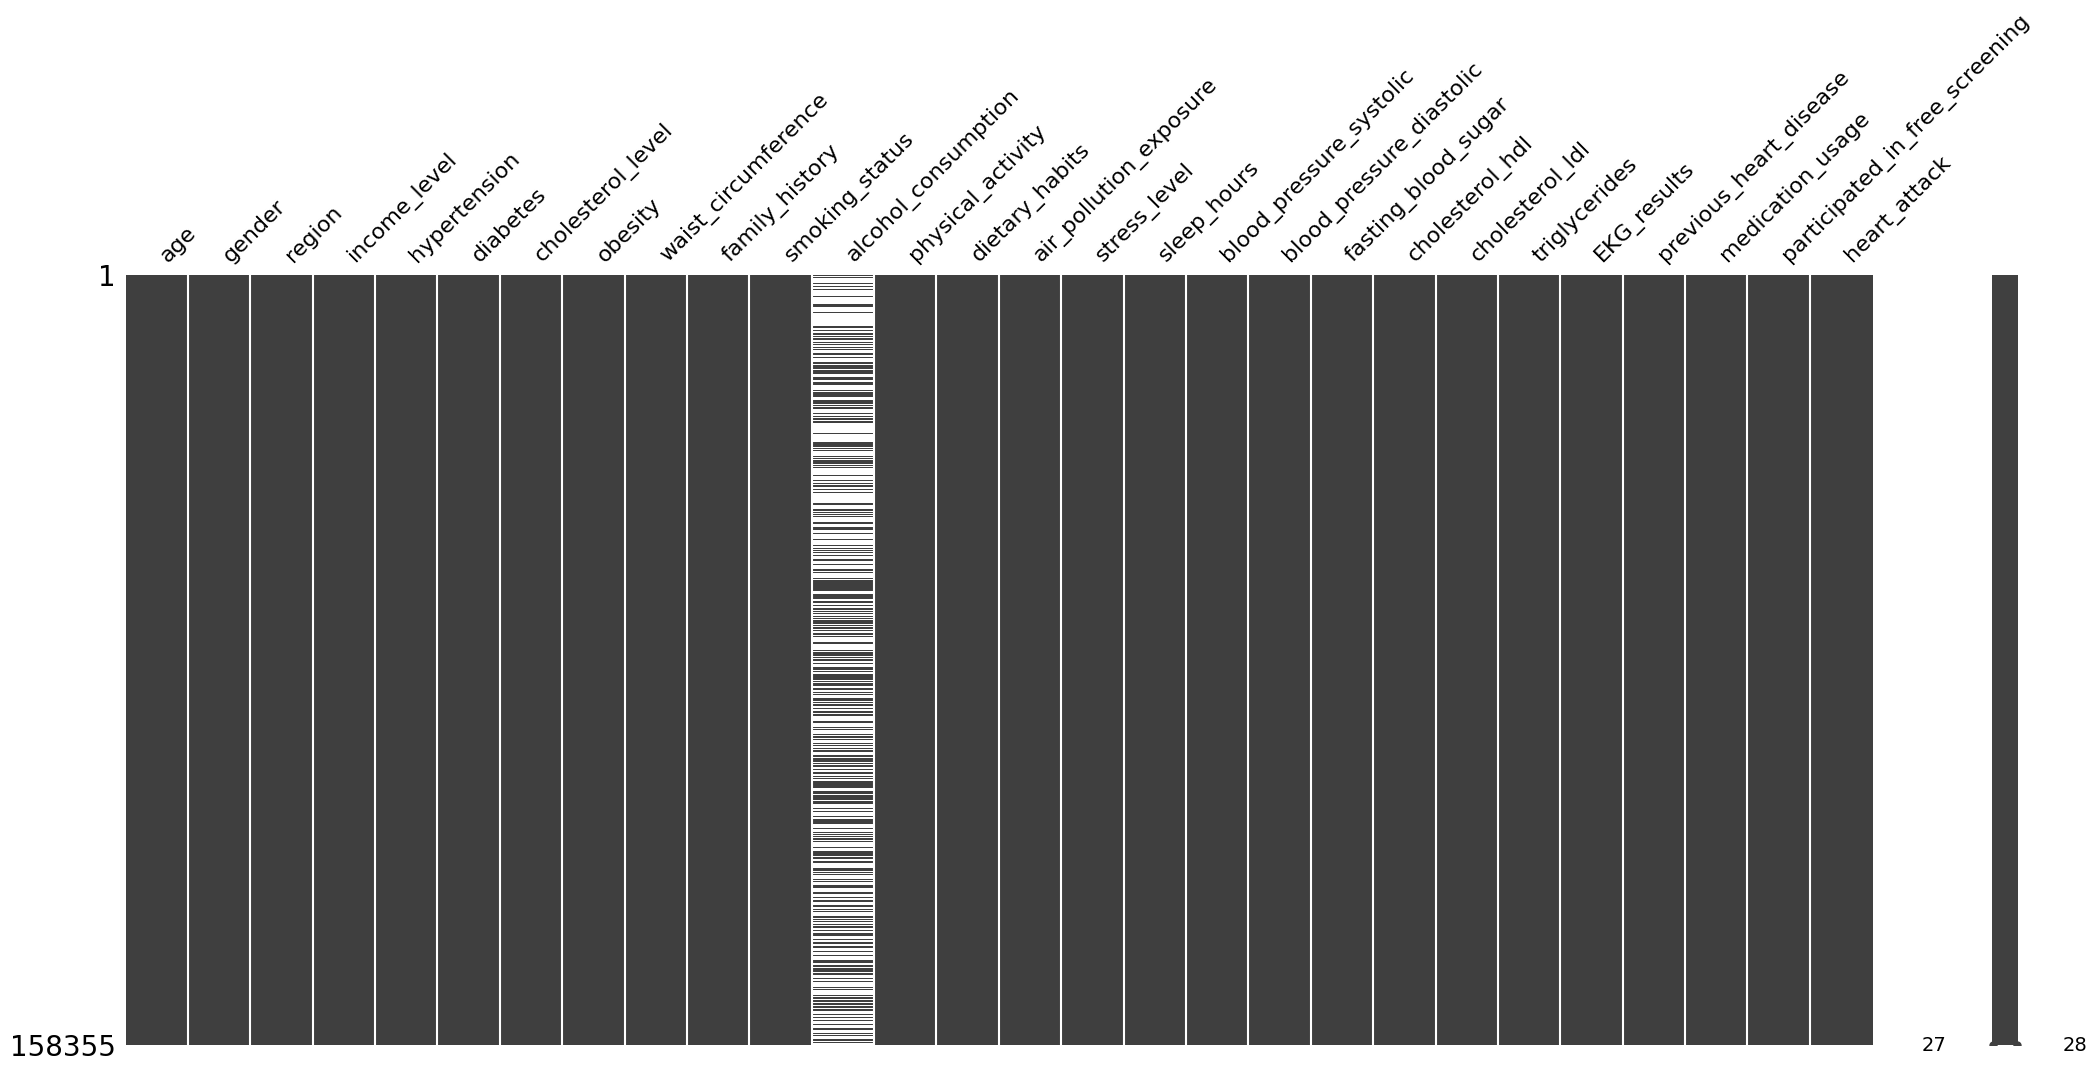

In [ ]:
# Visualization Missing Values
import missingno as msno
msno.matrix(df)
plt.show()

Missing value hanya ditemukan pada kolom alcohol_consumption, sehingga data cukup bersih.


## Visualization Data

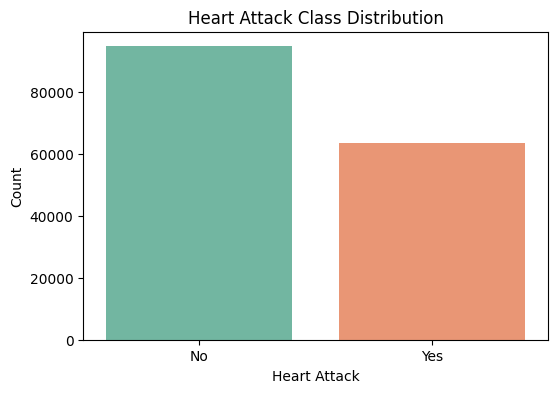

heart_attack
0    0.598996
1    0.401004
Name: proportion, dtype: float64


In [ ]:
# Heart Attack Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='heart_attack', data=df, palette='Set2')
plt.title('Heart Attack Class Distribution')
plt.xlabel('Heart Attack')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
print(df['heart_attack'].value_counts(normalize=True))

Distribusi target heart_attack sedikit tidak seimbang, dengan lebih banyak individu tidak mengalami serangan jantung dibandingkan yang mengalami senilai 59.8996% dengan yang mengalami senilai 40.1004%.

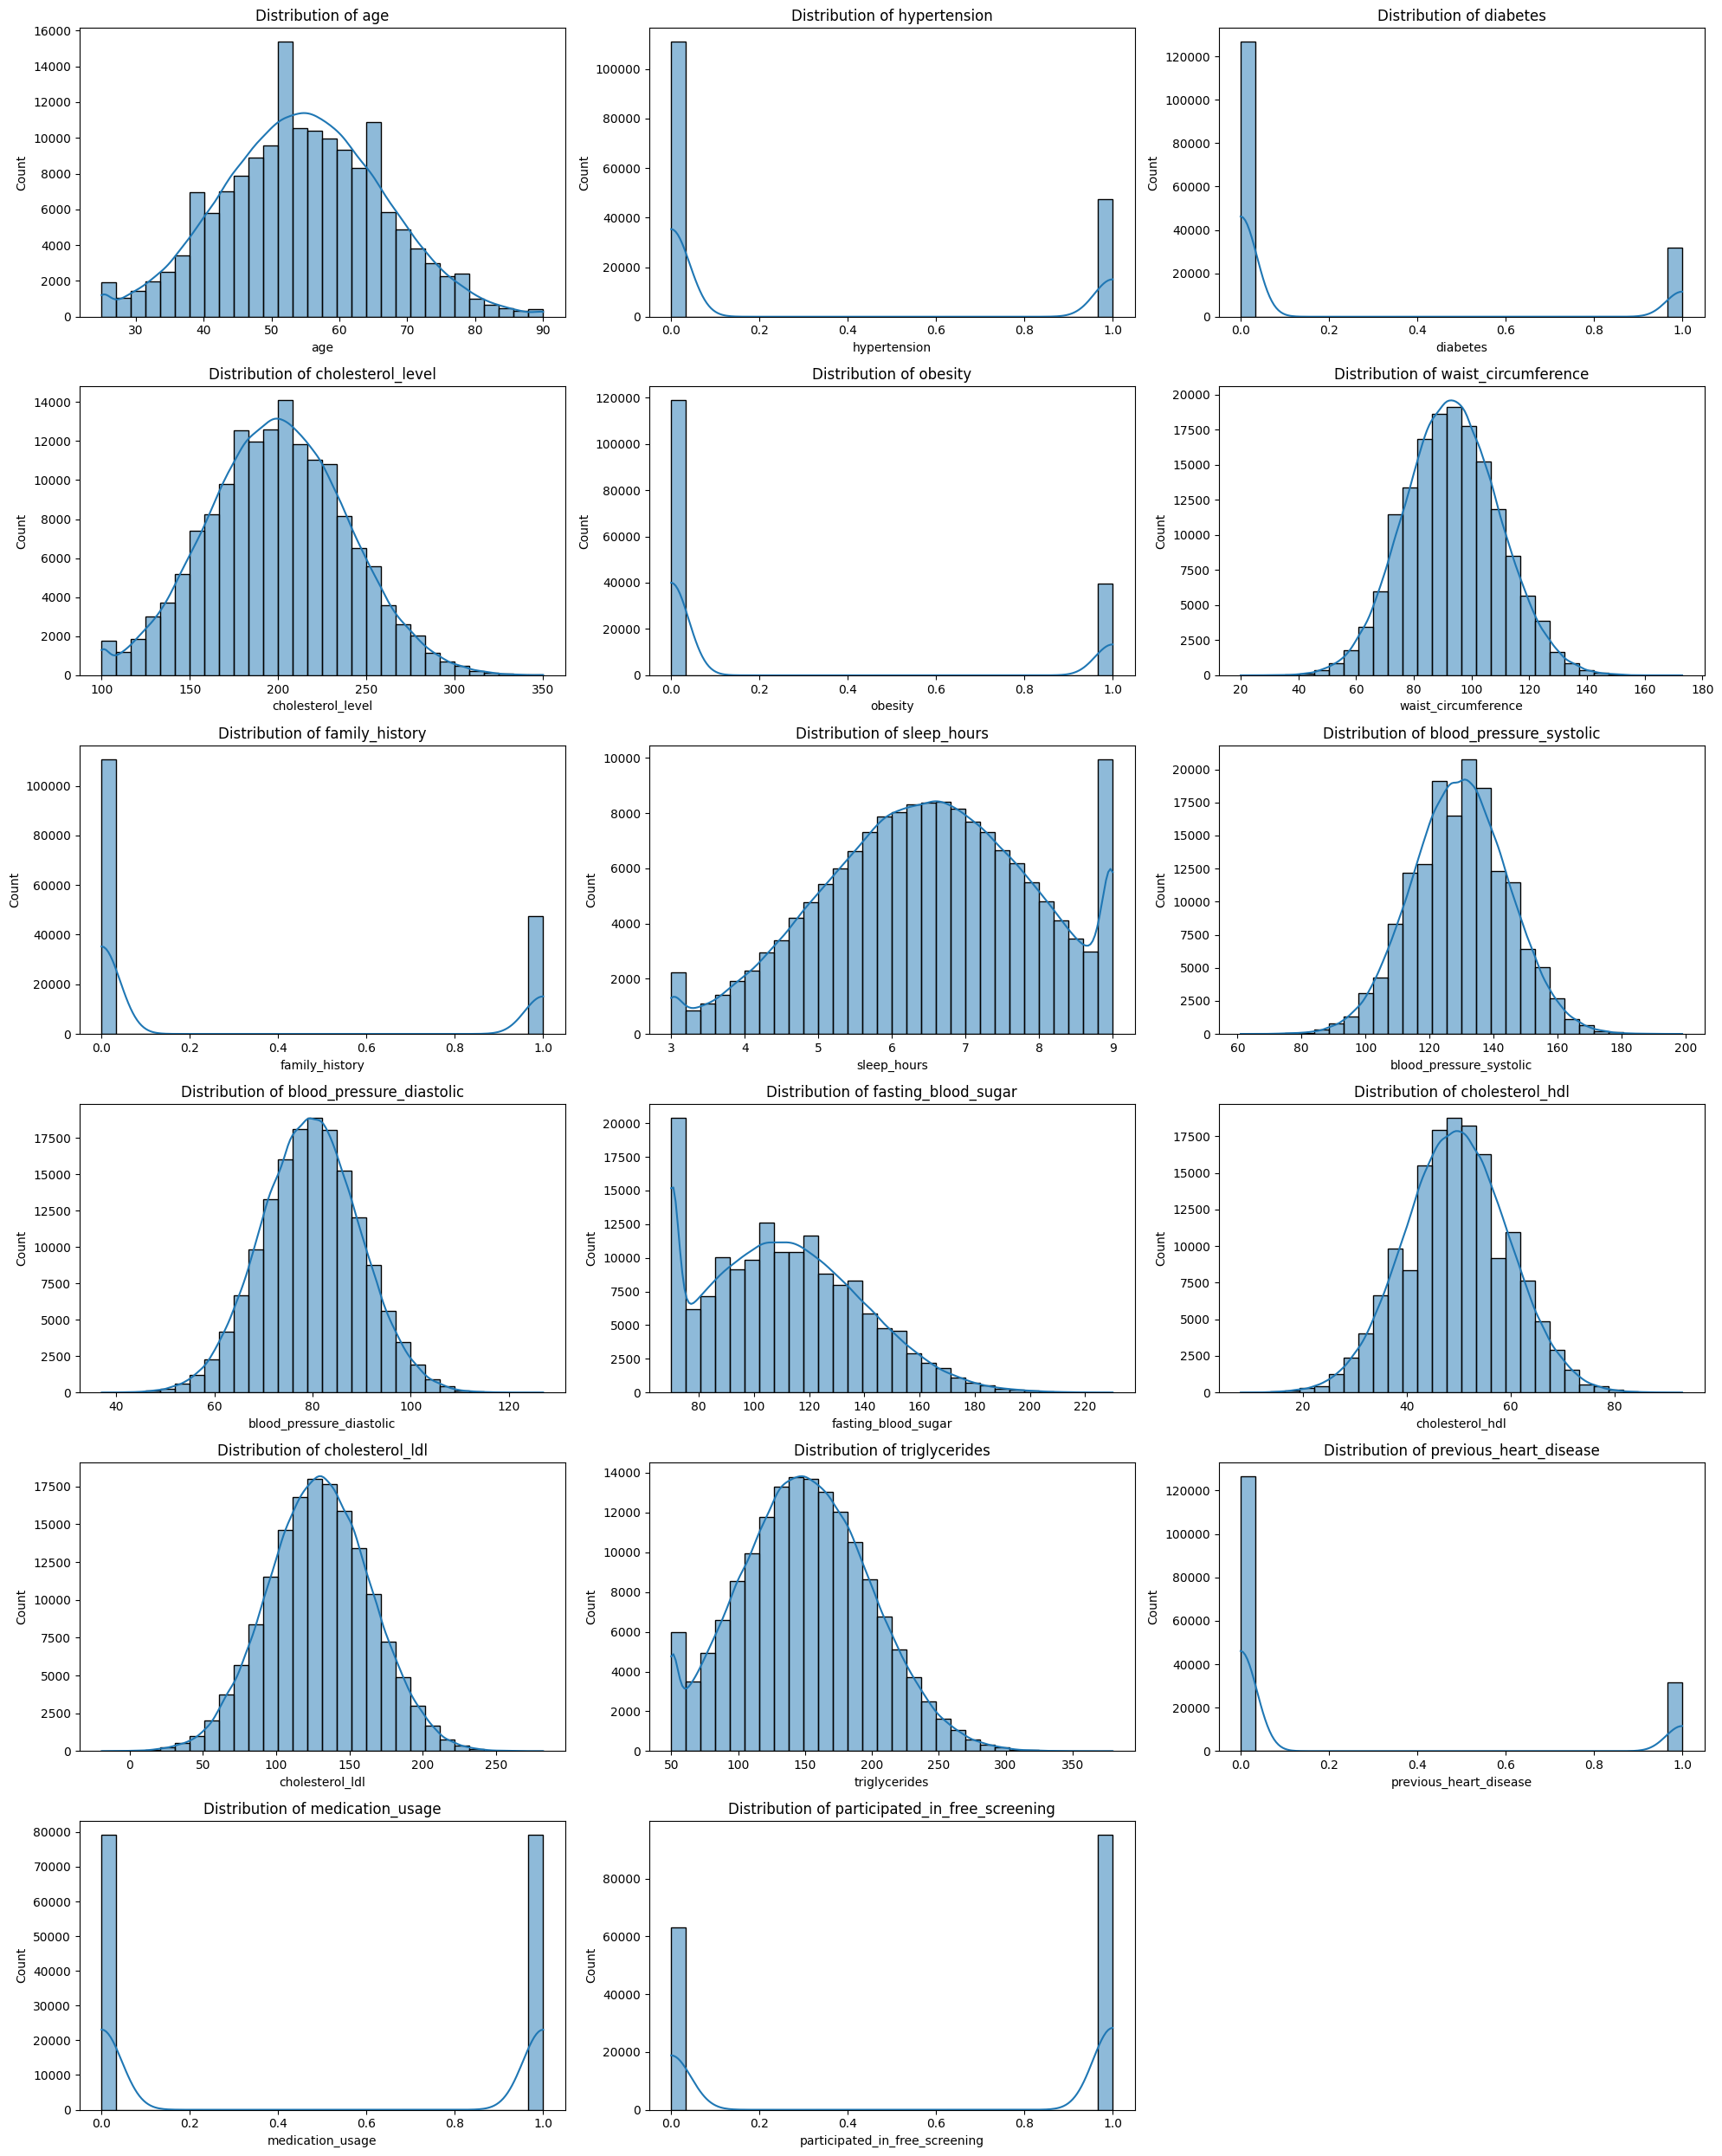

In [ ]:
# Feature Distirbution for numerical column
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('heart_attack')

plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


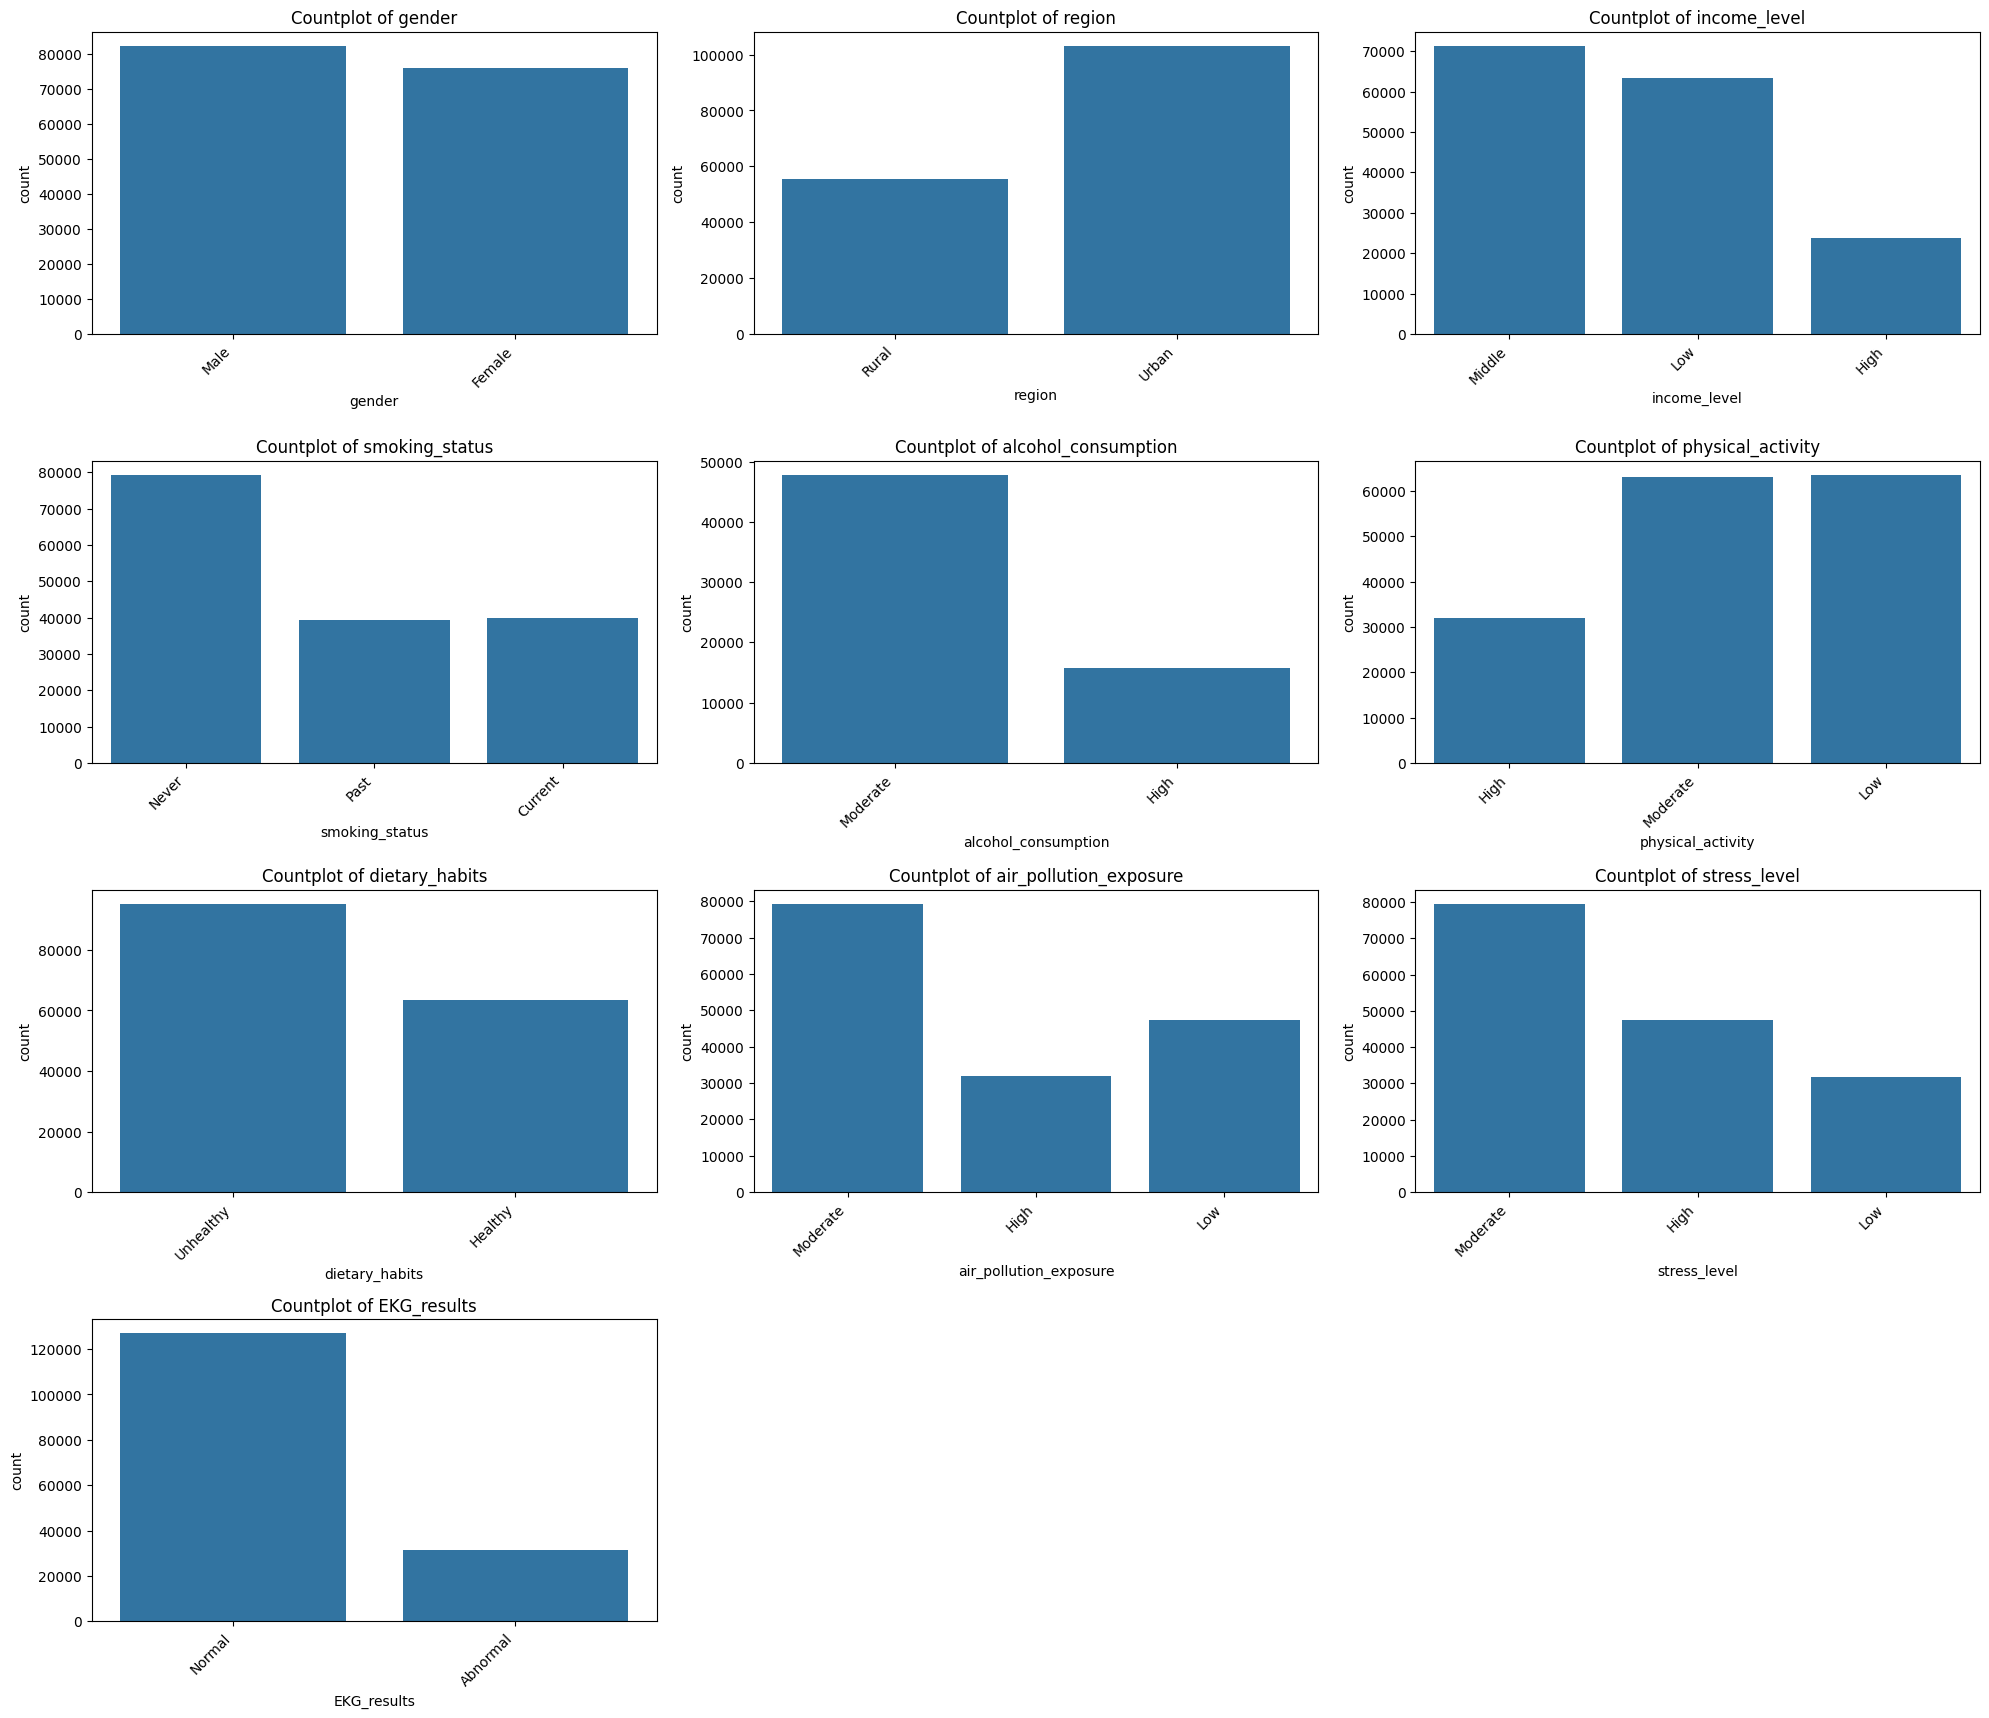

In [ ]:
# Feature Distirbution for categorical column
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

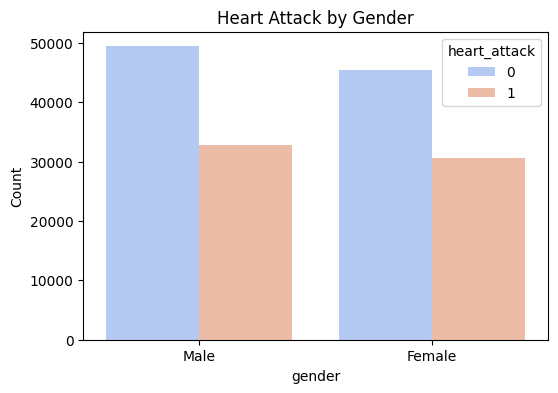

In [ ]:
# Gender vs Heart Attack
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='heart_attack', data=df, palette='coolwarm')
plt.title('Heart Attack by Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Koreksi tipe data: pastikan kolom numerik bertipe numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi Pearson antar kolom numerik
correlation_matrix = df_numeric.corr()

# Fokus pada korelasi terhadap 'heart_attack'
correlation_matrix['heart_attack'].sort_values(ascending=False)

heart_attack                      1.000000
previous_heart_disease            0.274775
hypertension                      0.269261
diabetes                          0.194512
obesity                           0.171720
age                               0.105756
cholesterol_level                 0.092611
fasting_blood_sugar               0.069826
waist_circumference               0.067883
medication_usage                  0.004694
family_history                    0.001374
sleep_hours                       0.000673
cholesterol_hdl                   0.000648
cholesterol_ldl                   0.000632
blood_pressure_diastolic         -0.000301
triglycerides                    -0.000709
blood_pressure_systolic          -0.001644
participated_in_free_screening   -0.003656
Name: heart_attack, dtype: float64

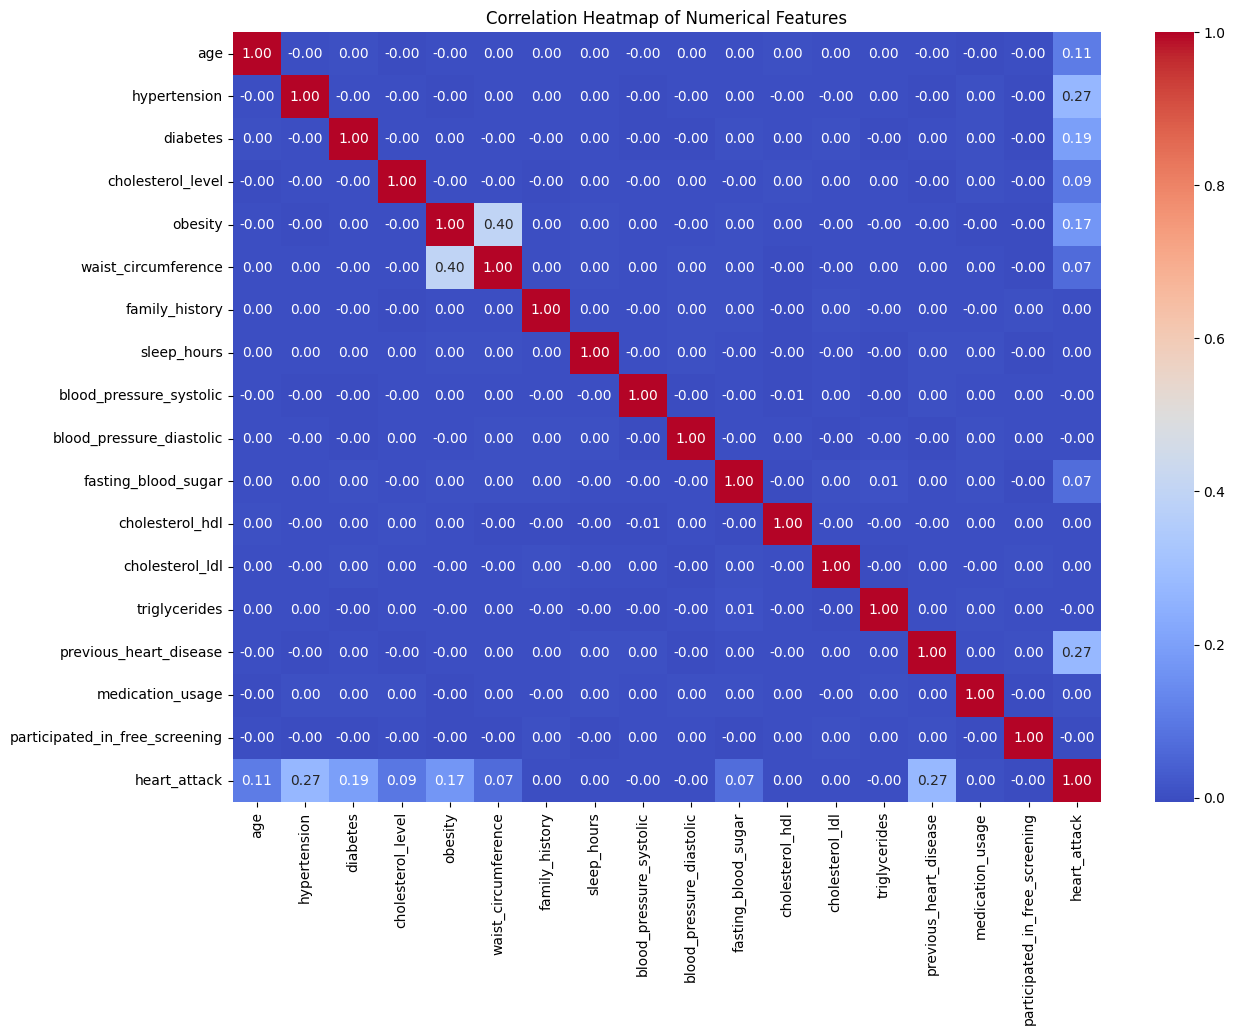

In [ ]:
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(14,10))
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


*   Penyakit jantung sebelumnya (previous_heart_disease) dan hipertensi (hypertension) adalah indikator kuat seseorang terkena serangan jantung.
*   Diabetes dan obesitas juga berkontribusi, meskipun lebih kecil.
*   Usia punya pengaruh, tapi tidak sebesar faktor kesehatan lainnya.
*   Beberapa fitur seperti tekanan darah (blood_pressure) dan kolesterol LDL/HDL anehnya korelasinya sangat kecil — kemungkinan perlu analisis lebih dalam atau datanya agak berantakan.

## Outlier

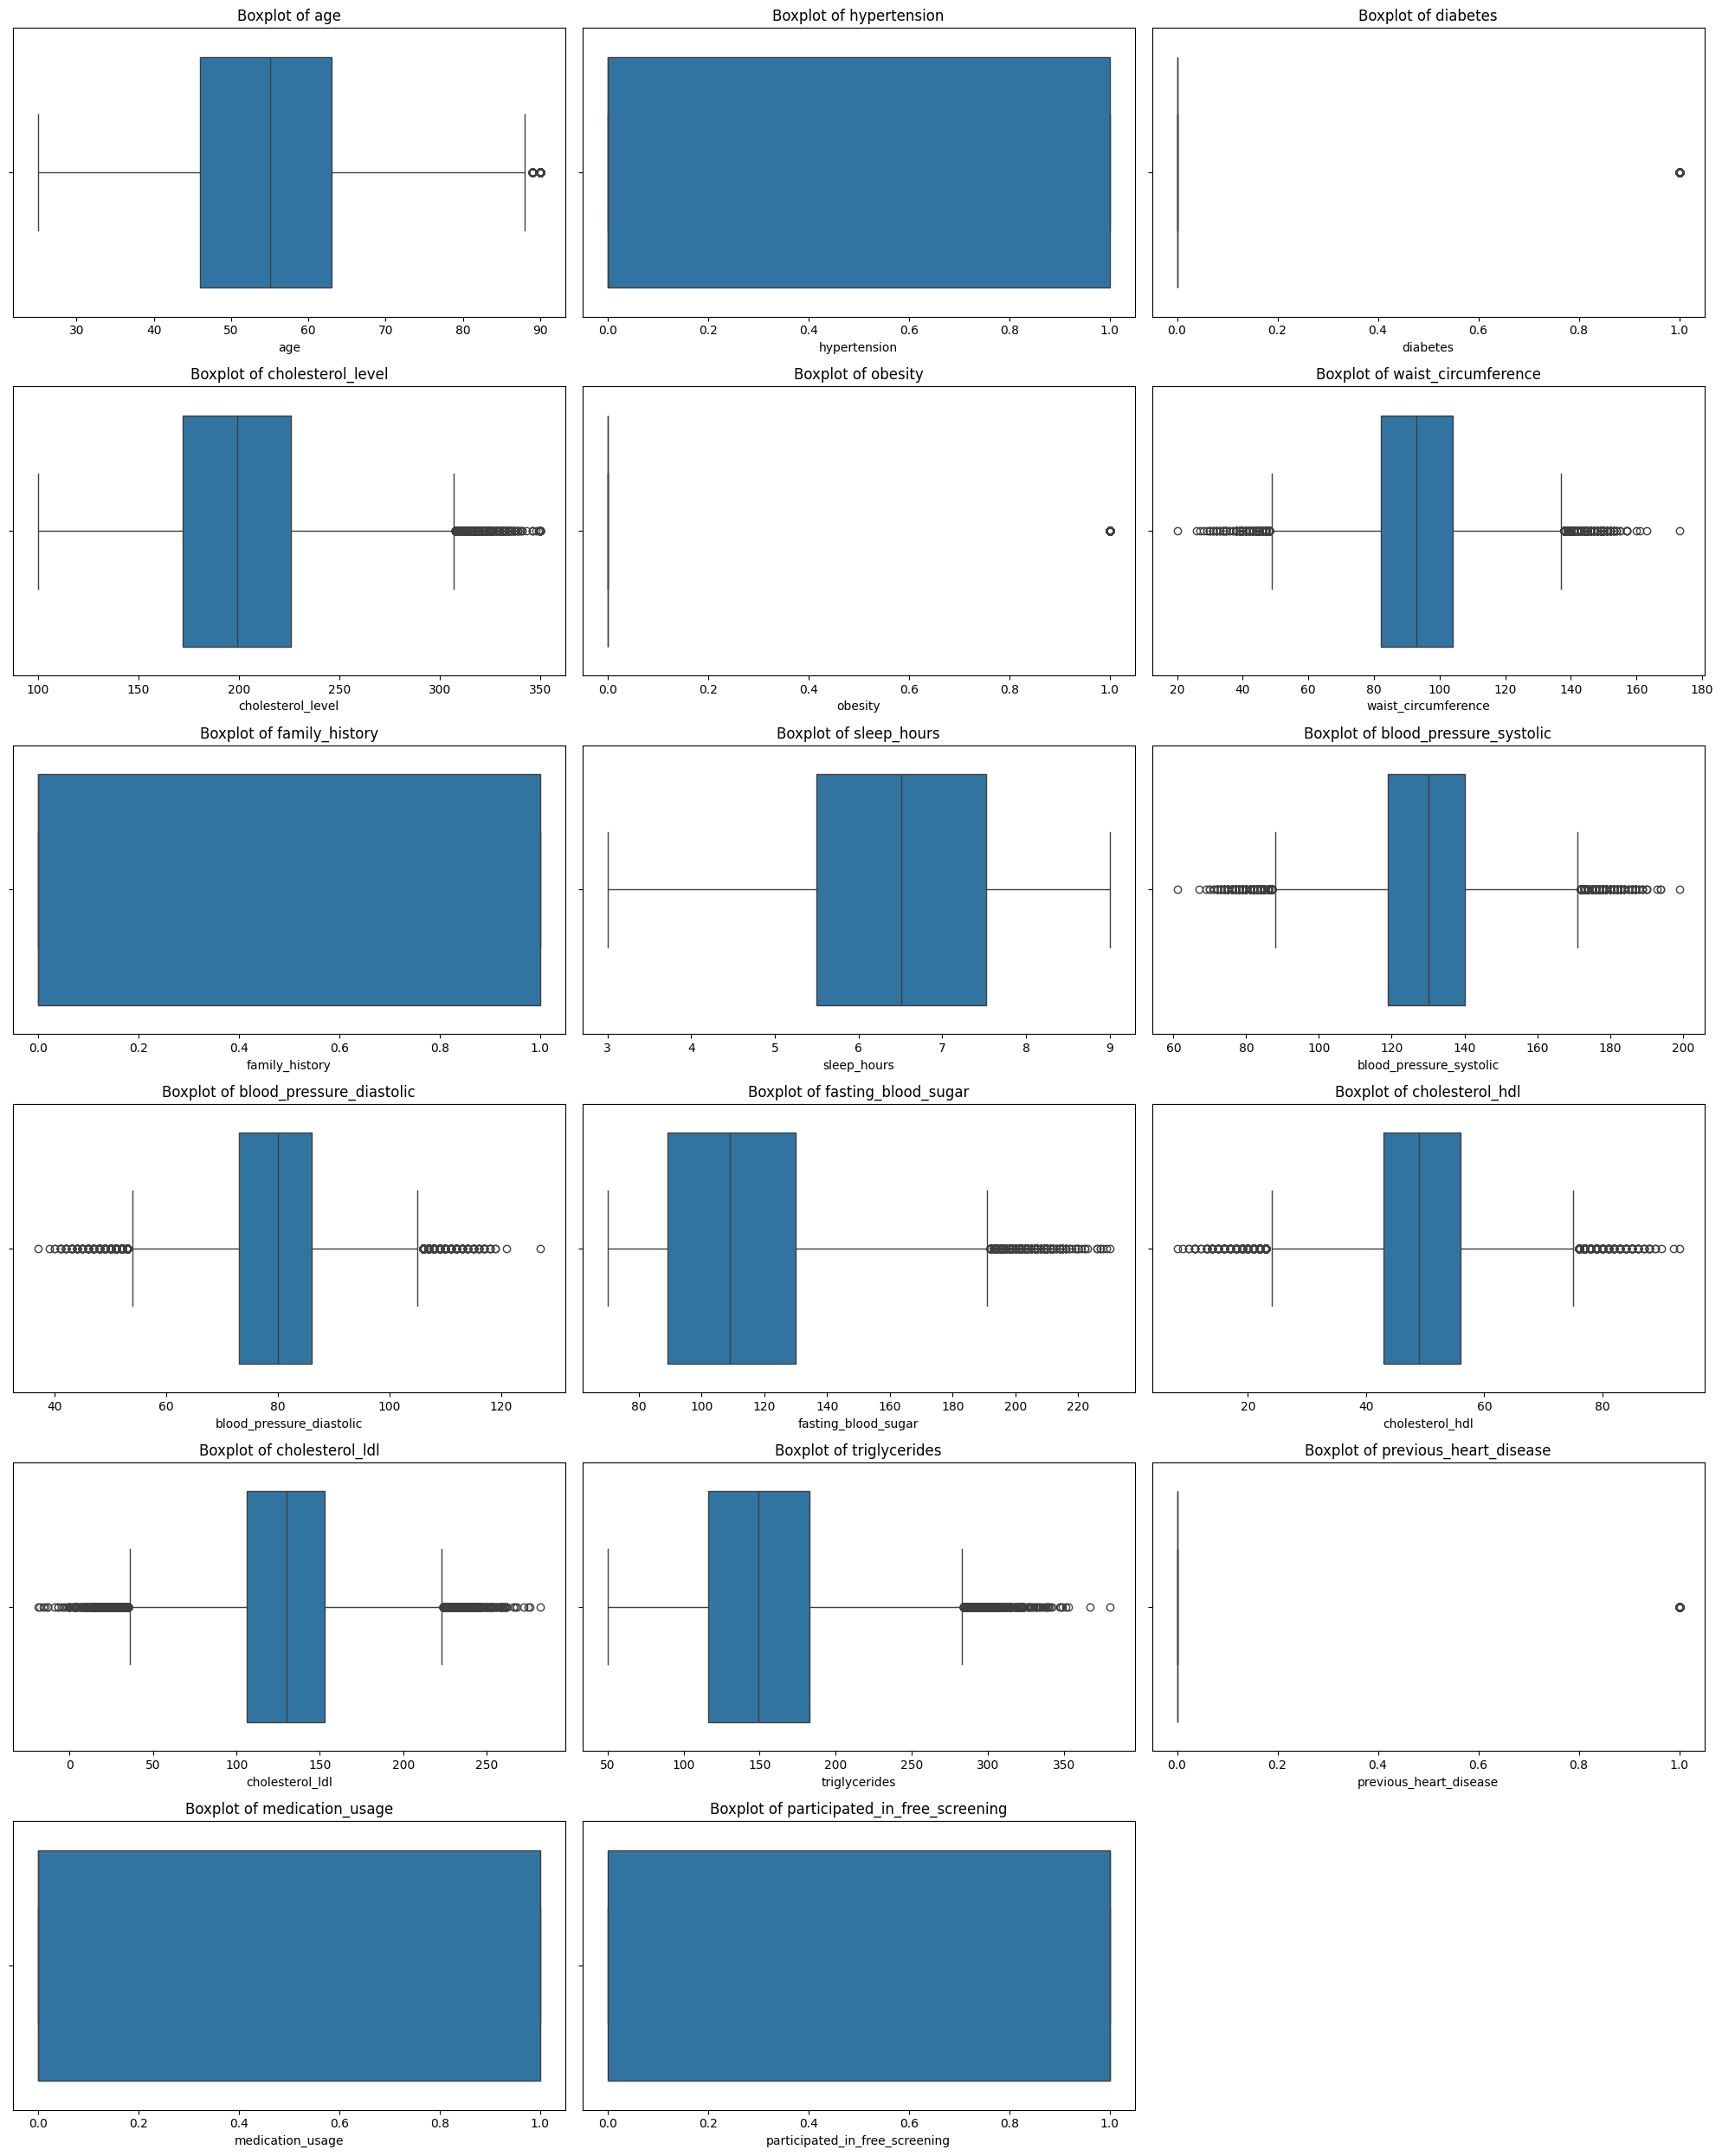

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(6, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Beberapa variabel numerik seperti `cholesterol_level`, `waist_circumference`, `blood_pressure_systolic`, `blood_pressure_diastolic`, `fasting_blood_sugar`, `cholestrol_hdl`, `cholestrol_ldl`, dan `triglycerides` menunjukkan outlier yang cukup banyak. Hal ini wajar karena belum melakukan proses data cleaning

In [ ]:
# Interactive Outlier visualization
fig = px.box(df, x='region', y='cholesterol_level', color='heart_attack',
             title="Cholesterol Levels by Region and Heart Attack Status")
fig.show()


# 🧹 Data cleaning: missing values, outliers

## Handling Missing Values

In [ ]:
# 1. Missing Values Overview
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
print("Missing Values per Feature:")
missing_df

Missing Values per Feature:


Missing Values  Percentage
alcohol_consumption           94848   59.895804

In [ ]:
# 2. Imputation Missing Values for 'alcohol_consumption'
print("Value counts sebelum imputasi:")
print(df['alcohol_consumption'].value_counts())

# Change the missing values with mode value (general cases)
df['alcohol_consumption'].fillna(df['alcohol_consumption'].mode()[0], inplace=True)

print("\n✅ Missing values pada 'alcohol_consumption' telah diimputasi dengan modus.")

Value counts sebelum imputasi:
alcohol_consumption
Moderate    47725
High        15782
Name: count, dtype: int64

✅ Missing values pada 'alcohol_consumption' telah diimputasi dengan modus.


In [ ]:
# 3. Re-check the missing values
print("Missing values setelah cleaning:")
df.isnull().sum()

Missing values setelah cleaning:


age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
alcohol_consumption               0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     0
EKG_results                       0
previous_heart_disease            0
medication_usage                  0
participated_in_free_screening    0
heart_attack                      0
dtype: int64

## Handling Outliers

In [ ]:
# 4. Detecting Outliers using IQR (Interquartile Range) and Remove rows outside 1.5*IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply untuk beberapa kolom
for col in ['age', 'cholesterol_level', 'waist_circumference',
            'blood_pressure_systolic', 'blood_pressure_diastolic',
            'fasting_blood_sugar', 'cholesterol_hdl',
            'cholesterol_ldl', 'triglycerides']:
    df = remove_outliers_iqr(df, col)

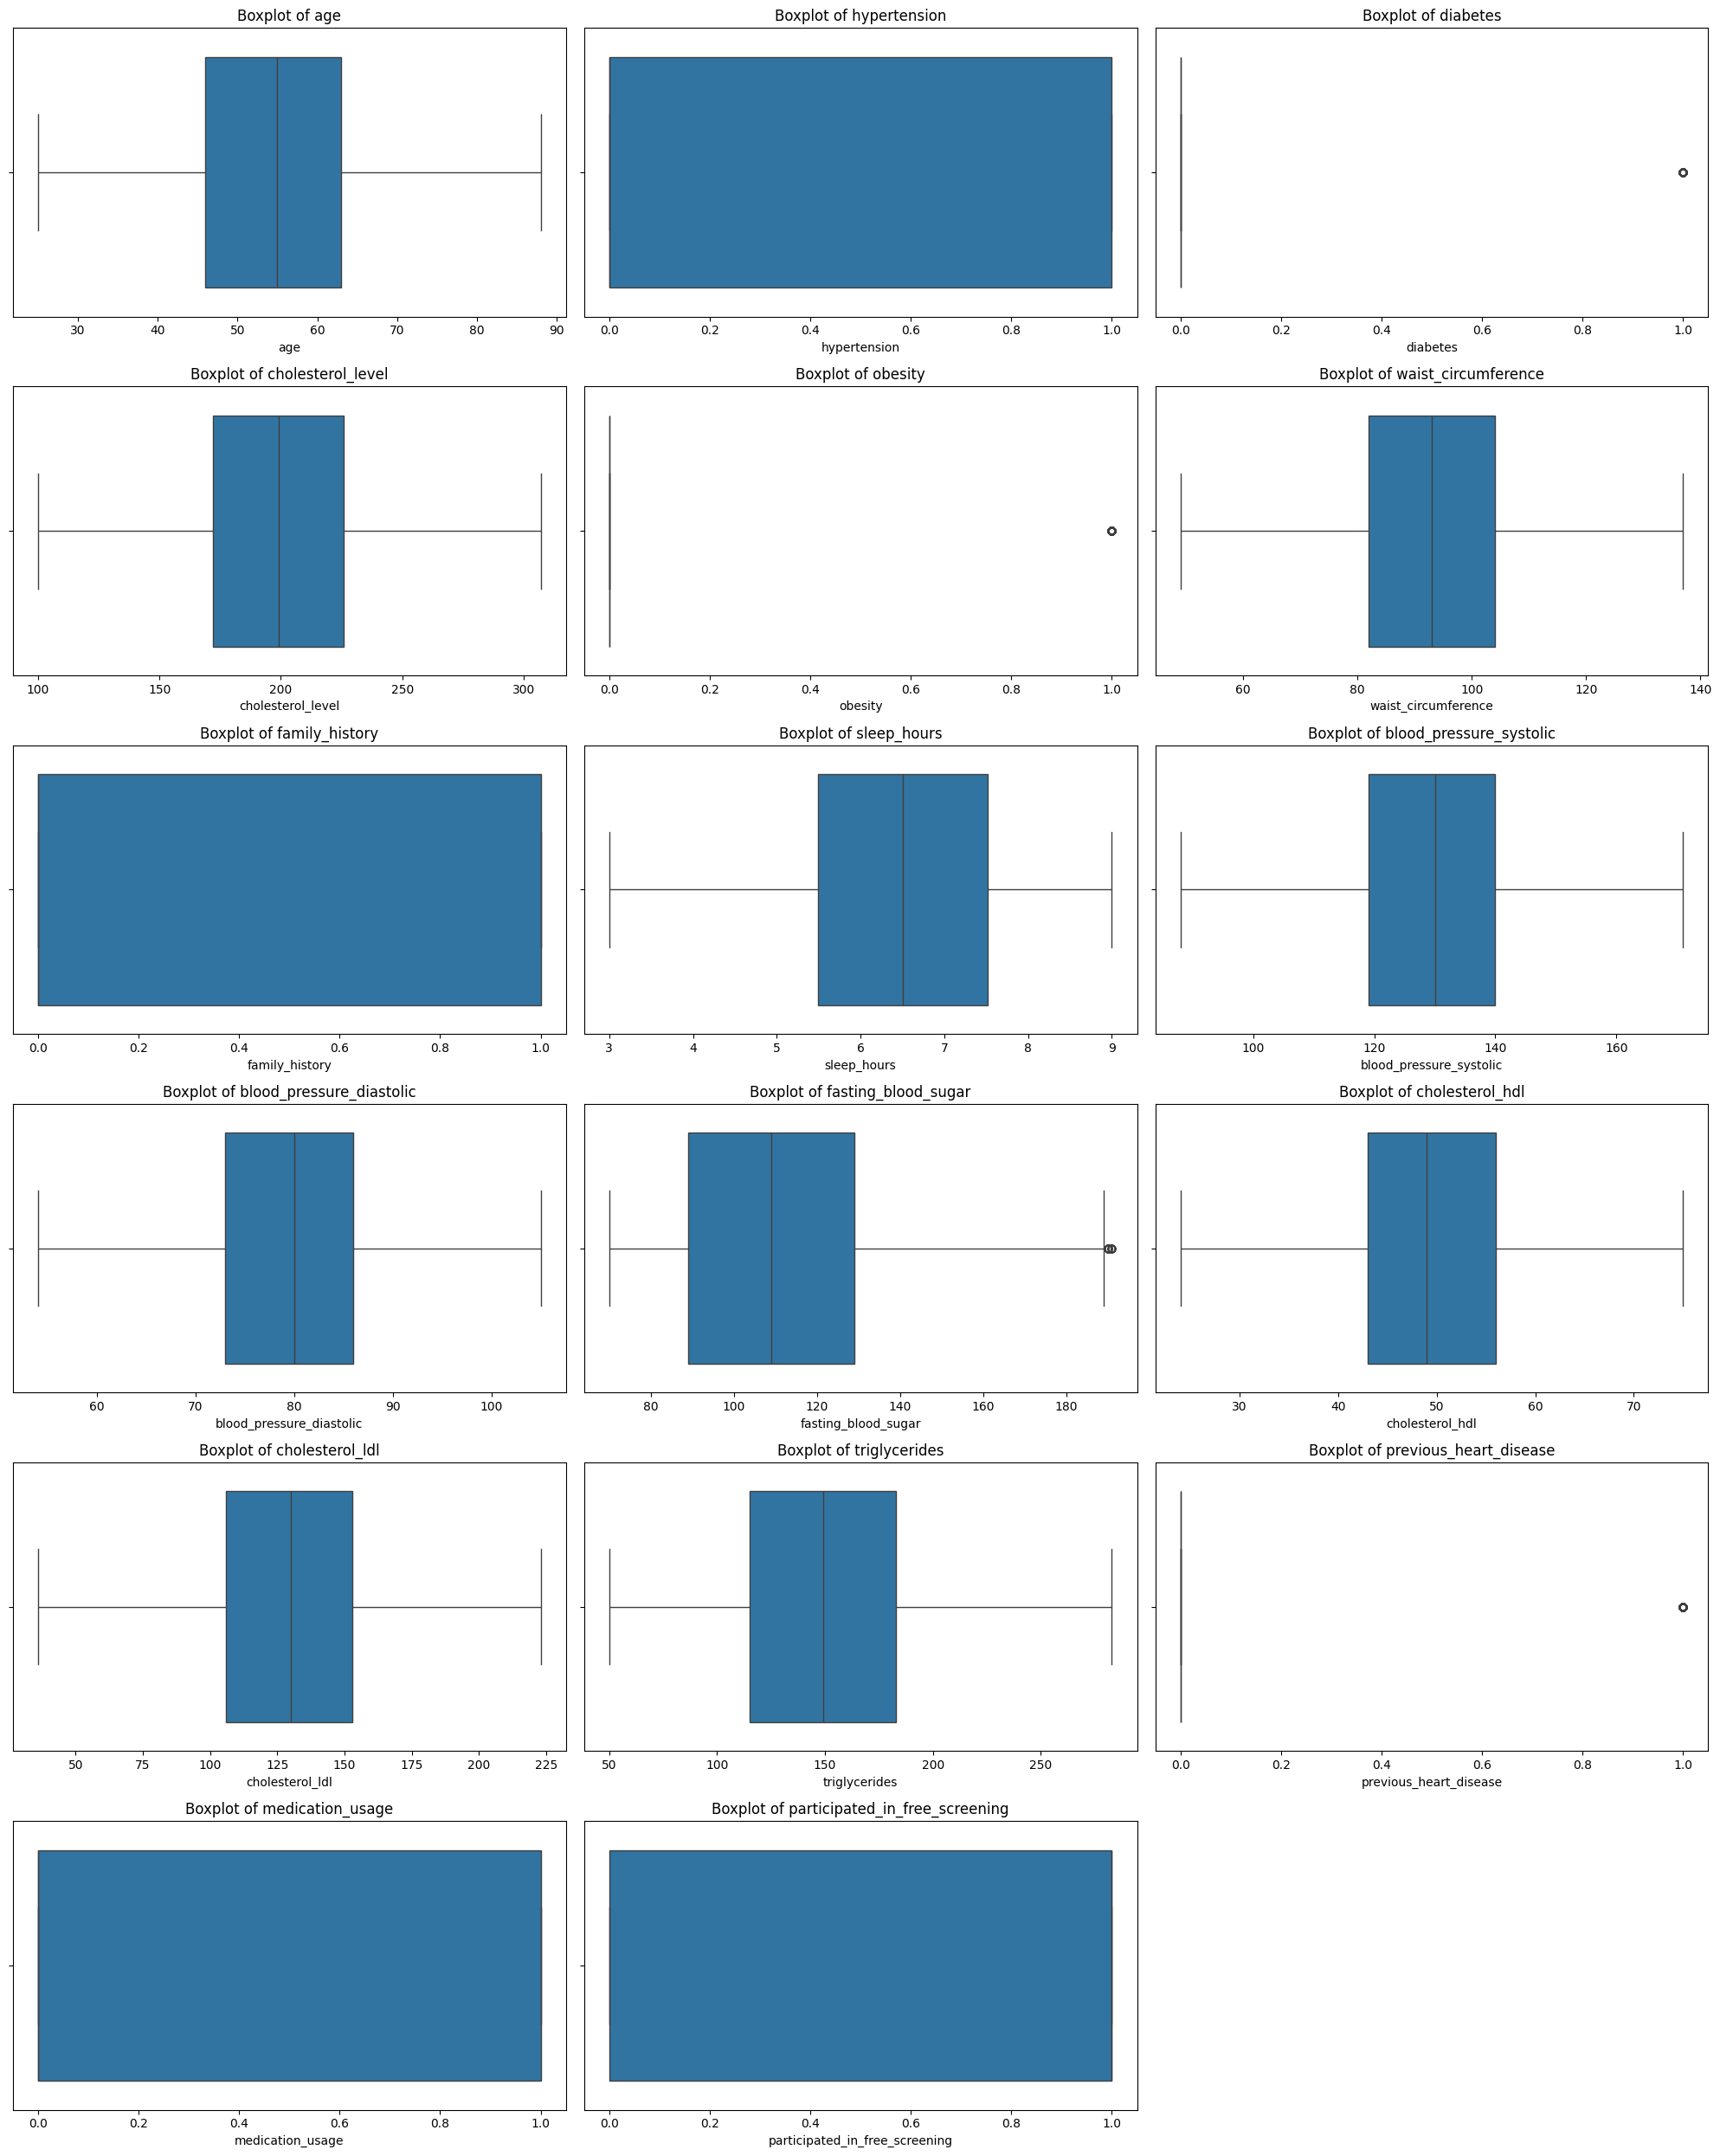

In [ ]:
#5. Revisualize boxplot outlier for numerical columns
plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(6, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Sudah terlihat outlier sudah bersih kecuali `fasting_blood_sugar`

In [ ]:
#6. Final Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150674 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             150674 non-null  int64  
 1   gender                          150674 non-null  object 
 2   region                          150674 non-null  object 
 3   income_level                    150674 non-null  object 
 4   hypertension                    150674 non-null  int64  
 5   diabetes                        150674 non-null  int64  
 6   cholesterol_level               150674 non-null  int64  
 7   obesity                         150674 non-null  int64  
 8   waist_circumference             150674 non-null  int64  
 9   family_history                  150674 non-null  int64  
 10  smoking_status                  150674 non-null  object 
 11  alcohol_consumption             150674 non-null  object 
 12  physical_activity    

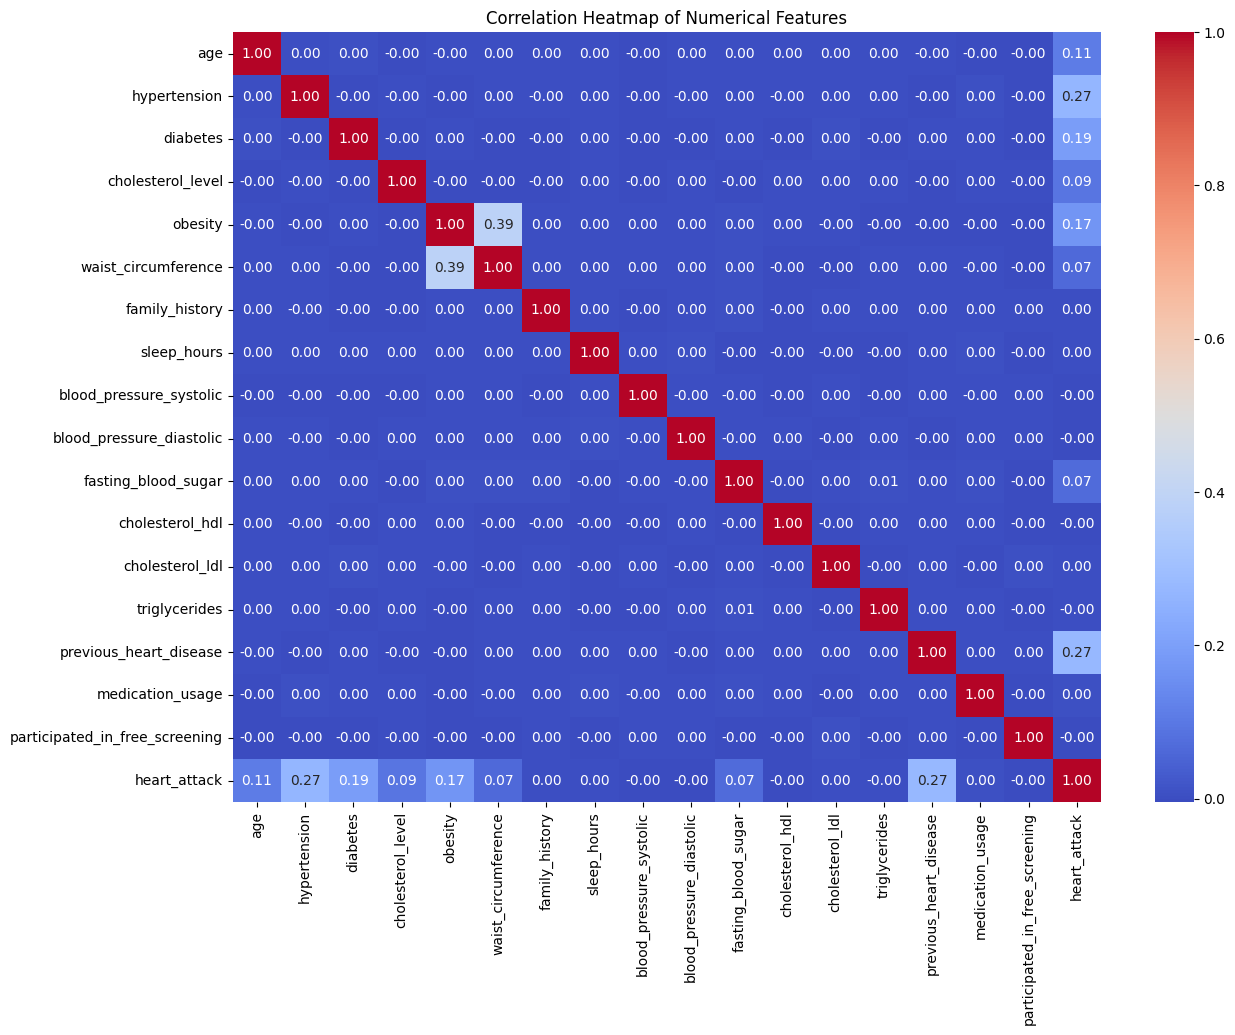

In [ ]:
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(14,10))
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Dari sini tidak ada perubahan signifikan kecuali pengaruh antara `obesity` dan `waist_circumference`

#🏷️ Encoding & scaling

In [ ]:
# Before Encoding & Scaling
df.head()

age  gender region income_level  hypertension  diabetes  cholesterol_level  \
0   60    Male  Rural       Middle             0         1                211   
1   53  Female  Urban          Low             0         0                208   
2   62  Female  Urban          Low             0         0                231   
3   73    Male  Urban          Low             1         0                202   
4   52    Male  Urban       Middle             1         0                232   

   obesity  waist_circumference  family_history  ... blood_pressure_diastolic  \
0        0                   83               0  ...                       62   
1        0                  106               1  ...                       76   
2        1                  112               1  ...                       74   
3        0                   82               1  ...                       65   
4        0                   89               0  ...                       75   

  fasting_blood_sugar cholesterol_hdl cholesterol_ldl triglycerides  \
0                 173              48             121           101   
1                  70              58              83           138   
2                 118              69             130           171   
3                  98              52              85           146   
4                 104              59             127           139   

  EKG_results  previous_heart_disease  medication_usage  \
0      Normal                       0                 0   
1      Normal                       1                 0   
2    Abnormal                       0                 1   
3      Normal                       0                 1   
4      Normal                       1                 0   

   participated_in_free_screening  heart_attack  
0                               0             0  
1                               1             0  
2                               0             1  
3                               1             0  
4                               1             1  

[5 rows x 28 columns]

## Train-Test Split

In [ ]:
# 1. Separate features and target
X = df.drop('heart_attack', axis=1)
y = df['heart_attack']

In [ ]:
# 2. Split the dataset
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train_raw.shape}")
print(f"Test set shape: {X_test_raw.shape}")

Training set shape: (120539, 27)
Test set shape: (30135, 27)


## Manual encoding melalui mapping dan scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define mappings
ordinal_mappings = {
    'income_level': {'Low': 0, 'Middle': 1, 'High': 2},
    'alcohol_consumption': {'None': 0, 'Moderate': 1, 'High': 2},
    'physical_activity': {'Low': 0, 'Moderate': 1, 'High': 2},
    'air_pollution_exposure': {'Low': 0, 'Moderate': 1, 'High': 2},
    'stress_level': {'Low': 0, 'Moderate': 1, 'High': 2}
}

binary_mappings = {
    'gender': {'Male': 0, 'Female': 1},
    'region': {'Urban': 0, 'Rural': 1},
    'dietary_habits': {'Healthy': 0, 'Unhealthy': 1},
    'EKG_results': {'Normal': 0, 'Abnormal': 1}
}

num_cols = [
    'age', 'cholesterol_level', 'waist_circumference',
    'blood_pressure_systolic', 'blood_pressure_diastolic',
    'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
    'triglycerides', 'sleep_hours'
]

def preprocess_dataset(X_raw, ordinal_mappings, binary_mappings, num_cols, scaler=None, fit_scaler=False, reference_columns=None):
    X = X_raw.copy()

    # 1. Mapping ordinal
    for col, mapping in ordinal_mappings.items():
        if col in X.columns:
            X[col] = X[col].map(mapping)

    # 2. Mapping binary
    for col, mapping in binary_mappings.items():
        if col in X.columns:
            X[col] = X[col].map(mapping)

    # 3. One-hot encoding
    if 'smoking_status' in X.columns:
        X = pd.get_dummies(X, columns=['smoking_status'], drop_first=True)

    # 4. Align columns jika ada reference (supaya test/simulasi cocok dengan train)
    if reference_columns is not None:
        X = X.reindex(columns=reference_columns, fill_value=0)

    # 5. Scaling fitur numerik
    if fit_scaler:
        scaler = StandardScaler()
        X[num_cols] = scaler.fit_transform(X[num_cols])
    else:
        if scaler is not None:
            X[num_cols] = scaler.transform(X[num_cols])
        else:
            raise ValueError("Scaler must be provided if fit_scaler=False.")

    return X, scaler


In [ ]:
# Preprocess training set
X_train, scaler = preprocess_dataset(
    X_train_raw,
    ordinal_mappings=ordinal_mappings,
    binary_mappings=binary_mappings,
    num_cols=num_cols,
    scaler=None,
    fit_scaler=True,
    reference_columns=None
)

# Preprocess testing set (pakai scaler dan columns dari X_train)
X_test, _ = preprocess_dataset(
    X_test_raw,
    ordinal_mappings=ordinal_mappings,
    binary_mappings=binary_mappings,
    num_cols=num_cols,
    scaler=scaler,
    fit_scaler=False,
    reference_columns=X_train.columns
)

In [ ]:
#After Encoding & Scaling
X_train.head()

age  gender  region  income_level  hypertension  diabetes  \
103020 -0.800557       0       0             2             0         1   
50276  -0.462026       0       1             0             0         1   
16170  -1.139088       1       0             2             1         0   
33313   0.553567       1       0             0             1         0   
11529  -0.969822       0       1             1             0         1   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
103020           0.072994        1             0.677098               0  ...   
50276            1.399169        1             0.551561               0  ...   
16170            0.047491        0             0.237719               1  ...   
33313           -0.360563        1             0.677098               0  ...   
11529           -0.717610        1             1.367551               1  ...   

        fasting_blood_sugar  cholesterol_hdl  cholesterol_ldl  triglycerides  \
103020            -0.233751         2.234556        -0.460875       1.067821   
50276              0.501084         2.546374        -0.667435       0.902437   
16170             -0.895102         0.259708         0.306345      -2.053804   
33313             -0.270492        -1.507262         2.106363       0.364939   
11529              1.272661         1.091223         0.660447      -0.027848   

        EKG_results  previous_heart_disease  medication_usage  \
103020            0                       0                 1   
50276             0                       1                 1   
16170             0                       1                 1   
33313             0                       0                 1   
11529             1                       1                 1   

        participated_in_free_screening  smoking_status_Never  \
103020                               0                 False   
50276                                1                  True   
16170                                0                  True   
33313                                0                  True   
11529                                0                  True   

        smoking_status_Past  
103020                False  
50276                 False  
16170                 False  
33313                 False  
11529                 False  

[5 rows x 28 columns]

In [ ]:
X_test.head()

age  gender  region  income_level  hypertension  diabetes  \
66019  -1.139088       0       0             2             0         0   
109727  0.299669       1       0             1             0         0   
151843  1.992323       0       1             0             1         1   
143112 -0.885190       1       1             0             0         0   
45383   1.992323       0       1             1             0         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
66019            0.353531        0             0.300487               1  ...   
109727          -1.635731        0            -0.703808               0  ...   
151843          -0.972644        0             0.614329               0  ...   
143112          -0.768617        0            -0.076124               0  ...   
45383           -0.488080        1             2.120772               1  ...   

        fasting_blood_sugar  cholesterol_hdl  cholesterol_ldl  triglycerides  \
66019              0.611309         2.026677         0.955532       0.240901   
109727            -0.527685        -1.819081         0.778481      -0.730731   
151843             0.501084         0.363647        -1.139571       0.861091   
143112             0.243892         0.571526        -0.933011      -0.193233   
45383              0.868502         1.506980        -0.165790      -0.234579   

        EKG_results  previous_heart_disease  medication_usage  \
66019             0                       0                 1   
109727            1                       0                 1   
151843            0                       0                 0   
143112            0                       0                 0   
45383             0                       0                 0   

        participated_in_free_screening  smoking_status_Never  \
66019                                1                 False   
109727                               1                 False   
151843                               1                 False   
143112                               1                  True   
45383                                1                  True   

        smoking_status_Past  
66019                  True  
109727                 True  
151843                False  
143112                False  
45383                 False  

[5 rows x 28 columns]

#🤖 Modeling & evaluasi

## Modeling & Training

In this section, we train three classification models: Logistic Regression, LightGBM, and CatBoost.
These models are selected due to their balance between interpretability, speed, and performance on structured/tabular data.

In [ ]:
!pip install lightgbm catboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
# Initialize models
log_reg = LogisticRegression(random_state=42)
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42)

In [ ]:
# Train models
log_reg.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 48109, number of negative: 72430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1398
[LightGBM] [Info] Number of data points in the train set: 120539, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.399116 -> initscore=-0.409151
[LightGBM] [Info] Start training from score -0.409151


## Evaluation Metrics

We evaluate each model based on Accuracy, Precision, Recall, and F1-Score to understand their performance on unseen data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Predict probabilities for AUC-ROC
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:,1]
    else:
        # For models like Logistic Regression with no predict_proba
        y_probs = model.decision_function(X_test)

    auc = roc_auc_score(y_test, y_probs)
    return acc, prec, rec, f1, auc

In [ ]:
# Create evaluation results
from sklearn.metrics import roc_auc_score
models = {
    'Logistic Regression': log_reg,
    'LightGBM': lgbm,
    'CatBoost': catboost
}

results = []

for name, model in models.items():
    acc, prec, rec, f1, auc = evaluate_model(model, X_test, y_test)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC-ROC': auc,
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)
results_df

Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
1             LightGBM  0.734229   0.687337  0.612871  0.647972  0.813806
2             CatBoost  0.734030   0.687757  0.610959  0.647087  0.811794
0  Logistic Regression  0.727128   0.686984  0.581026  0.629578  0.800162

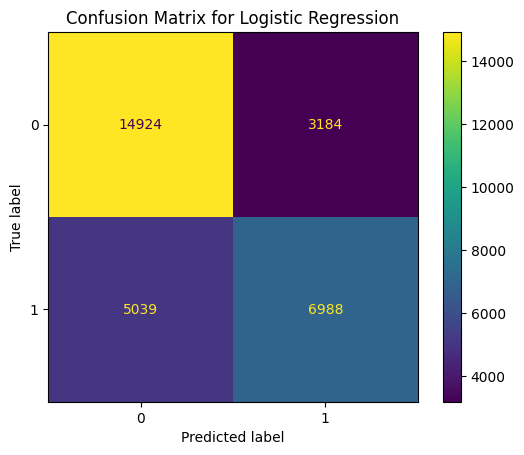

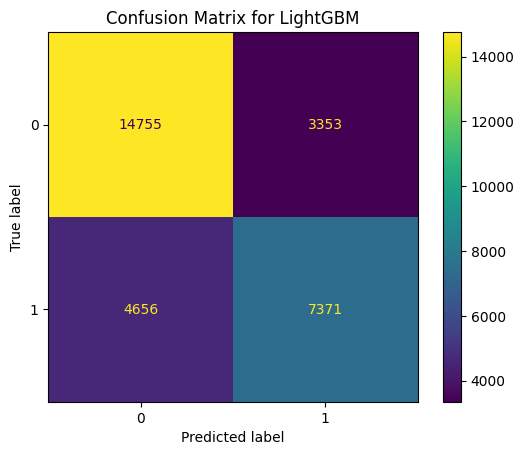

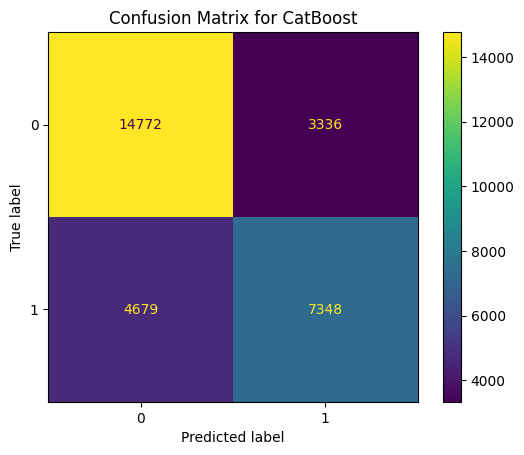

In [ ]:
# Confusion matrix for each model
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

Untuk modeling saat ini LightGBM lebih unggul dari segala aspek kecuali Precision meskipun hanya ada perbedaan yang kecil sekali jika dibandingkan dengan CatBoost ataupun Logistic Regression, Mari kita coba HyperParameter Tuning apakah ada perbedaan ?

#📊 Interpretasi model (feature importance & SHAP)

## Feature Importance sebelum Tuning

### 1. Feature Importance Logistic Regression Before Tuning

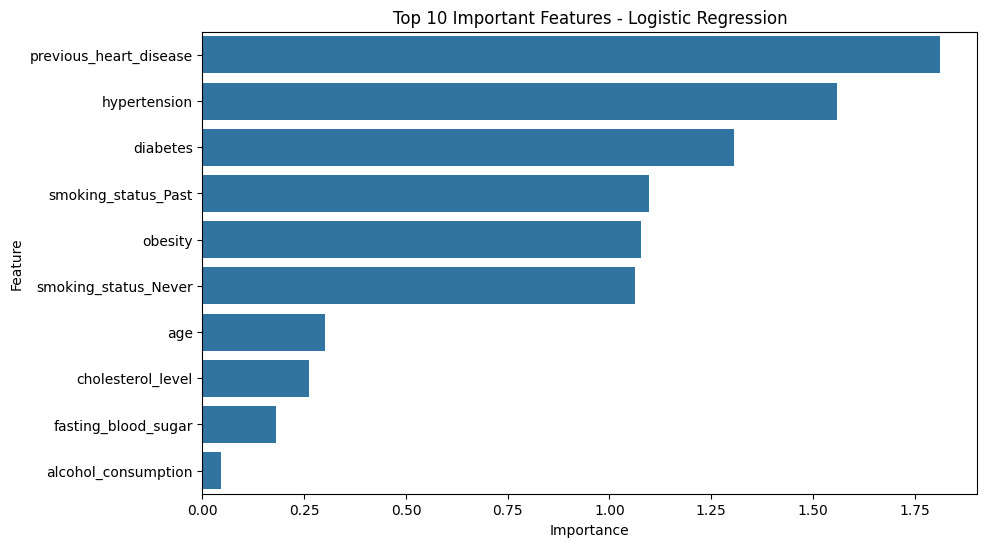

In [ ]:
# Feature importance for Logistic Regression
log_reg_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_reg.coef_[0])
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=log_reg_importance.head(10))
plt.title('Top 10 Important Features - Logistic Regression')
plt.show()

Logistic Regression menunjukkan fitur paling penting adalah `previous_heart_disesase`, dan `hypertension`, dilanjutkan dengan '`diabetes`, `smoking_status_Past`, `obesity`, dan `smoking_status_never`. Sisanya tidak memiliki pengaruh yang signifikan dengan variable sebelumnya.

### 2. Feature Importance LightGBM Before Tuning

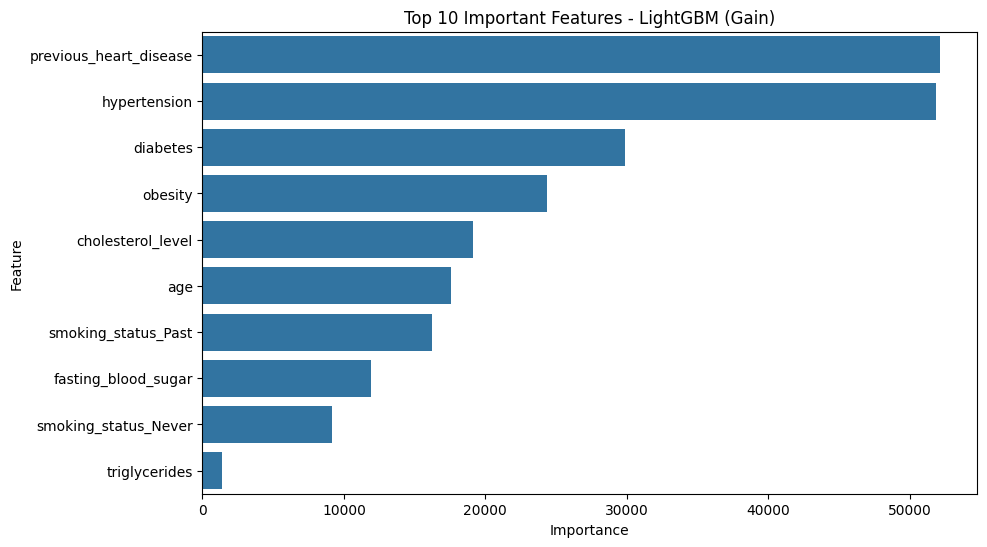

In [ ]:
importance_gain = lgbm.booster_.feature_importance(importance_type='gain')

# Buat DataFrame
lgbm_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_gain
}).sort_values(by='Importance', ascending=False)

# Plot manual pakai seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=lgbm_importance.head(10))
plt.title('Top 10 Important Features - LightGBM (Gain)')
plt.show()

LightGBM menunjukkan fitur paling penting adalah `previous_heart_disesase`, dan `hypertension` yang dimana sama dengan apa yang dikatakan model Logistic Regression, dilanjutkan dengan '`diabetes`, `obesity`, `cholestrol_level`, `age`, `smoking_status_past`, `fasting_blood_sugar`, dan `smoking_status_never` yang pengaruhnya semakin menurun. Kembali dengan sisa variable yang tidak disebutkan hanya memiliki nilai yang sangat sulit berpengaruh

### 3. Feature Importance CatBoost Before Tuning

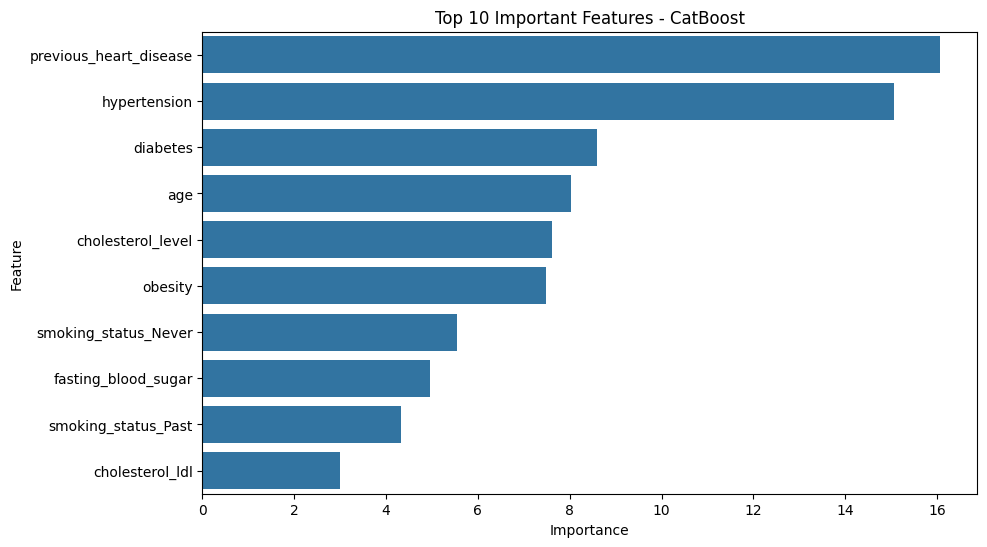

In [ ]:
# Feature importance for CatBoost
catboost_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': catboost.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=catboost_importance.head(10))
plt.title('Top 10 Important Features - CatBoost')
plt.show()

CatBoost juga menunjukkan fitur paling penting sama dengan 2 model sebelumnya
 adalah `previous_heart_disesase`, dan `hypertension` yang dimana sama dengan apa yang dikatakan model Logistic Regression juga LightGBM, dilanjutkan dengan '`diabetes`, `age`, `cholestrol_level`, `obesity`,  `smoking_status_Never`, `fasting_blood_sugar`, `smoking_status_never`, `cholestrol_ldl` yang pengaruhnya menurun seiring urutan variablenya.

Sehingga di Feature Importance sebelum tuning ini bisa dilihat bahwa
- Variable yang penting atau berpengaruh secara signifikan yakni `previous_heart_disesase`, dan `hypertension`, disusul `diabetes` yang masih bisa berpengaruh signifikan meskipun tidak bisa dibandingkan dengan 2 variabel sebelumnya. Sisanya dilanjutin oleh `age`, `obesity`, `cholestrol_level`, `smoking_status_Never`, `smoking_status_Past`, dan `fasting_blood_sugar` yang nilai pengaruhnya bergantung pada masing-masing model
- LightGBM dan CatBoost memiliki feature importance baik variabel maupun nilai yang mirip bisa dilihat dalam grafik, menandakan bahwa kedua model konsisten.

## HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

### 1. Logistic Regression Tuning

In [ ]:
# Logistic Regression Tuning
tuned_params_lr = {'C': [0.01, 0.1, 1, 10],
                   'penalty': ['l2'],
                   'solver': ['lbfgs']}

lr_tuned = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), tuned_params_lr, cv=5)
lr_tuned.fit(X_train, y_train)

print("Best Params Logistic Regression:", lr_tuned.best_params_)

Best Params Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


### 2. LightGBM Tuning

In [ ]:
import lightgbm as lgb

# LightGBM Tuning
param_grid_lgbm = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

lgbm_tuned = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid_lgbm, cv=5)
lgbm_tuned.fit(X_train, y_train)

print("Best Params LightGBM:", lgbm_tuned.best_params_)

[LightGBM] [Info] Number of positive: 38487, number of negative: 57944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1398
[LightGBM] [Info] Number of data points in the train set: 96431, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.399114 -> initscore=-0.409157
[LightGBM] [Info] Start training from score -0.409157
[LightGBM] [Info] Number of positive: 38487, number of negative: 57944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1398
[LightGBM] [Info] Number of data points in the train set: 96431, number of used features: 28
[LightGBM] [Info] 

### 3. CatBoosts Tuning



In [ ]:
# CatBoost Tuning
param_grid_cb = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'iterations': [100, 200]
}

catboost_tuned = GridSearchCV(CatBoostClassifier(verbose=0, random_seed=42), param_grid_cb, cv=5)
catboost_tuned.fit(X_train, y_train)

print("Best Params CatBoost:", catboost_tuned.best_params_)

Best Params CatBoost: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}


Ini hasil akhir dari hyperparameter tuning oleh 3 model tersebut:
- Logistic Regression: C=0.1, Penalty=L2, solver: lbfgs
- LightGBM: num_leaves=31, learning_rate=0.1, n_estimators=100
- CatBoost: depth=4, learning_rate=0.1, iterations=100

## 3. SHAP Interpretation

### Perbedaan Feature Importance dan SHAP

**Feature Importance** adalah metode sederhana untuk mengetahui seberapa besar kontribusi suatu fitur dalam proses prediksi model. Biasanya dihitung berdasarkan:
- Jumlah suatu fitur digunakan untuk split (Frequency-Based)
- Besarnya peningkatan performa karena split tersebut (Gain-Based)

Namun, **Feature Importance** tradisional punya kelemahan:
- Tidak memperhitungkan interaksi antar fitur
- Bisa bias terhadap fitur dengan banyak variasi (high cardinality)

---

**SHAP (SHapley Additive exPlanations)** adalah metode interpretasi yang lebih canggih:
- Menghitung kontribusi setiap fitur untuk setiap prediksi individual, berdasarkan prinsip teori permainan (Shapley values).
- Menghitung berapa "nilai tambah" atau "nilai pengurangan" masing-masing fitur terhadap prediksi model.
- Memberikan penjelasan **lokal** (per instance) dan **global** (keseluruhan model).

**Singkatnya:**
- **Feature Importance** → _"Apa fitur paling penting?"_
- **SHAP** → _"Seberapa besar dan ke arah mana fitur mempengaruhi prediksi, baik positif maupun negatif?"_



In [ ]:
import shap

### Logistic Regression SHAP

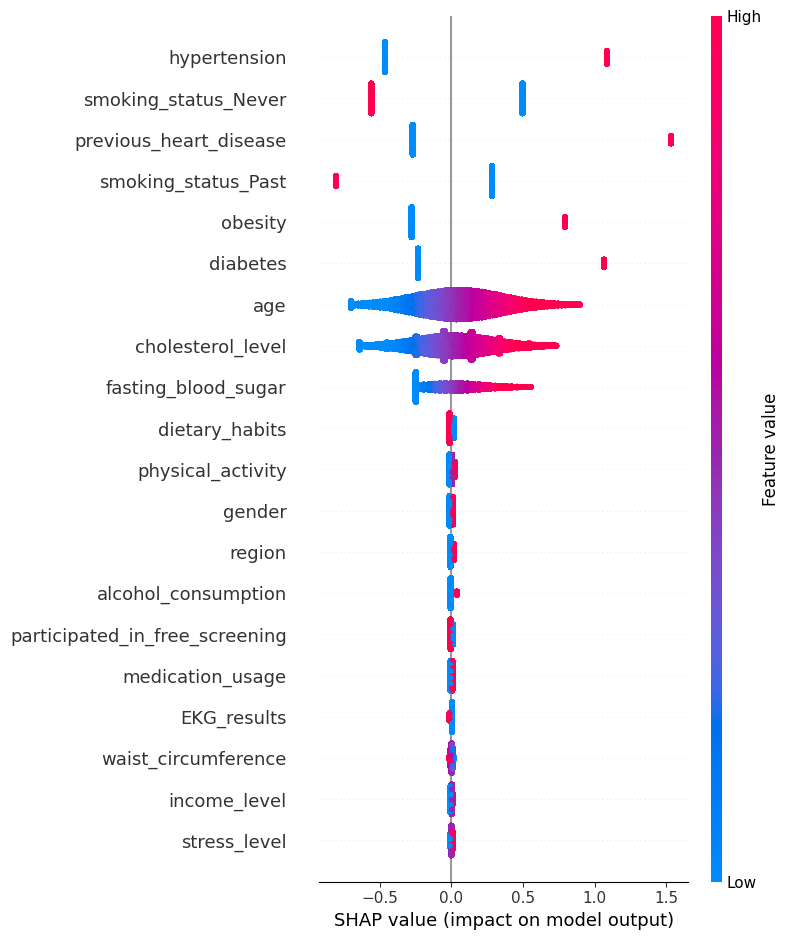

In [ ]:
# (Usually the result was less insightful)
explainer_lr = shap.Explainer(lr_tuned.best_estimator_, X_train)
shap_values_lr = explainer_lr(X_train)

# Ensure SHAP values are numpy arrays with standard float types
shap_values_lr_fixed = shap_values_lr.values.astype(np.float64)

# Ensure data types in X_train are compatible with SHAP
X_train_fixed = X_train.astype(float)

# Now try the summary plot again
shap.summary_plot(shap_values_lr_fixed, X_train_fixed)

### LightGBM SHAP

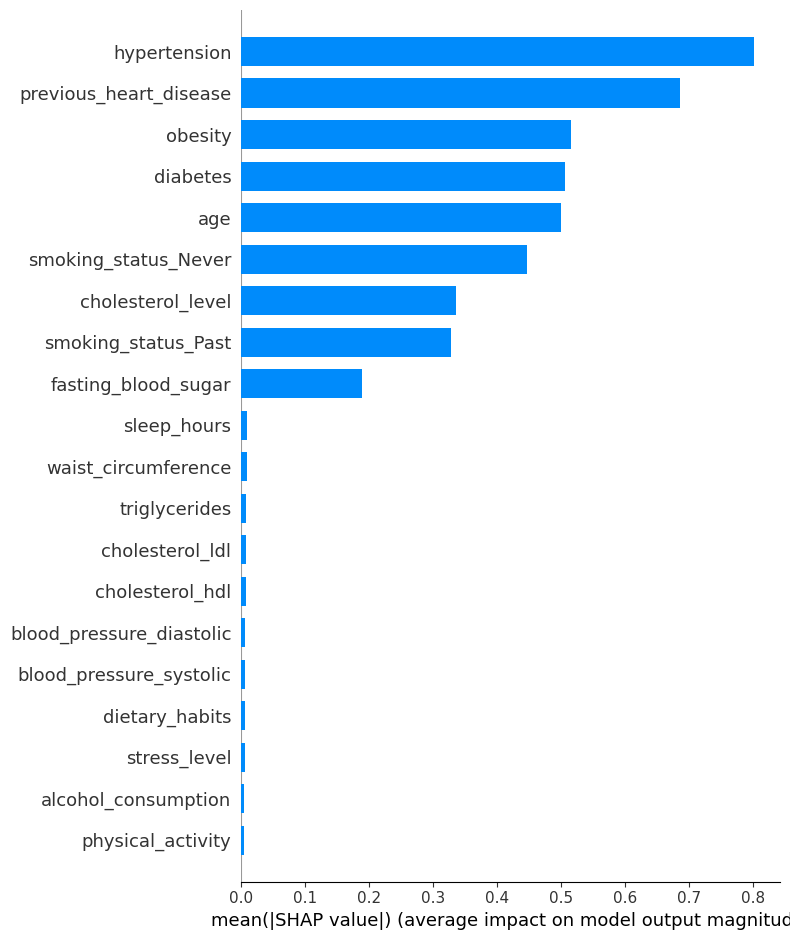

In [ ]:
explainer_lgb = shap.TreeExplainer(lgbm_tuned.best_estimator_)
shap_values_lgb = explainer_lgb.shap_values(X_train)

shap.summary_plot(shap_values_lgb, X_train, plot_type="bar")

###CatBoost SHAP

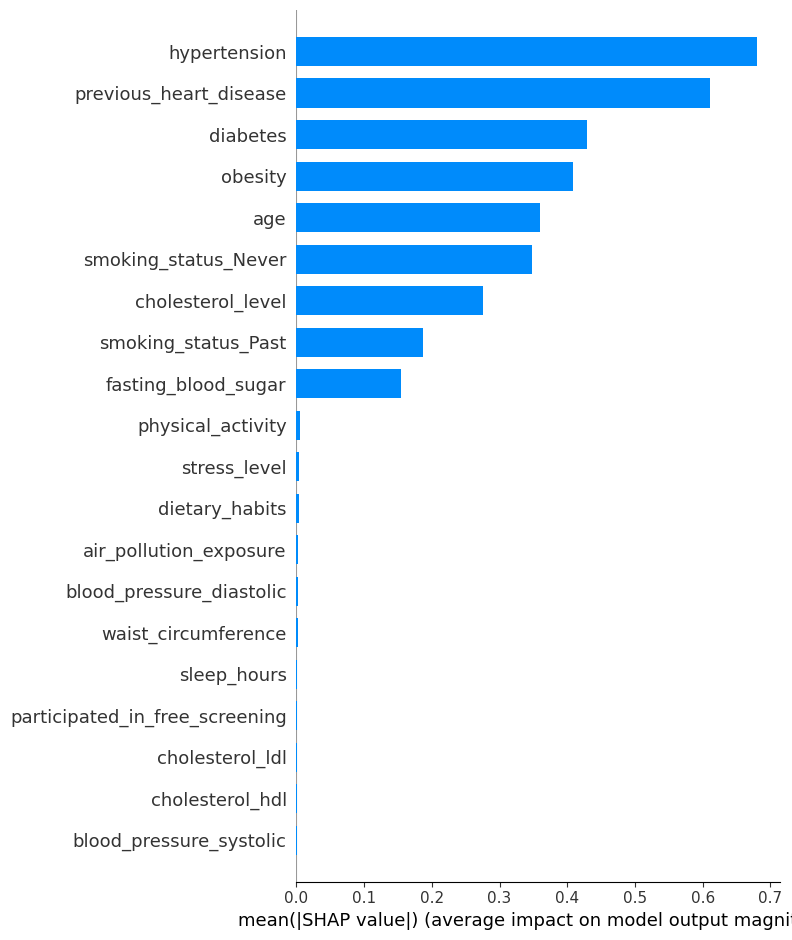

In [ ]:
explainer_cb = shap.TreeExplainer(catboost_tuned.best_estimator_)
shap_values_cb = explainer_cb.shap_values(X_train)

shap.summary_plot(shap_values_cb, X_train, plot_type="bar")

## Feature Importance after Tuning

### LightGBM After Tuning

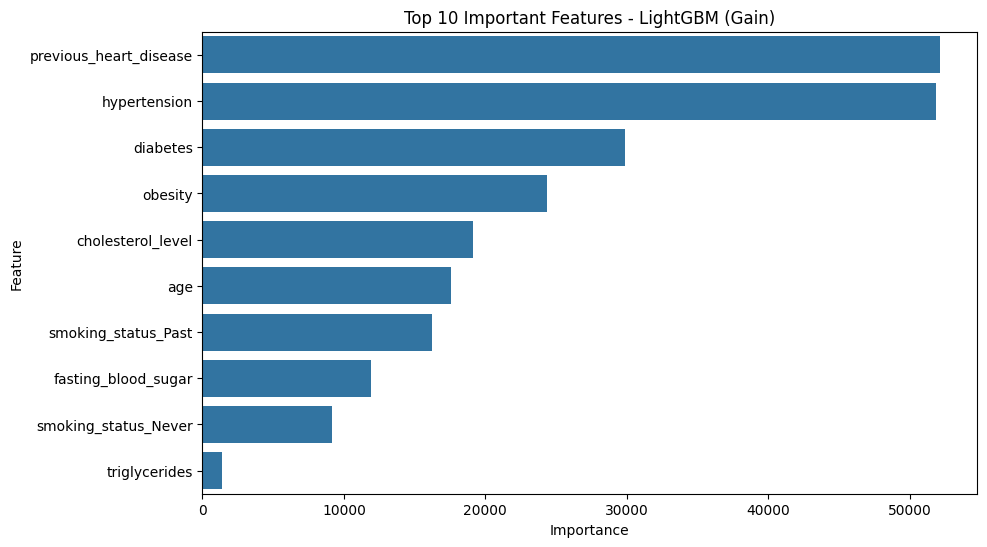

In [ ]:
#Ambil model terbaik dari GridSearchCV
best_lgbm = lgbm_tuned.best_estimator_
importance_gain = best_lgbm.booster_.feature_importance(importance_type='gain')

# Buat DataFrame
lgbm_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_gain
}).sort_values(by='Importance', ascending=False)

# Plot manual pakai seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=lgbm_importance.head(10))
plt.title('Top 10 Important Features - LightGBM (Gain)')
plt.show()

### CatBoots After Tuning

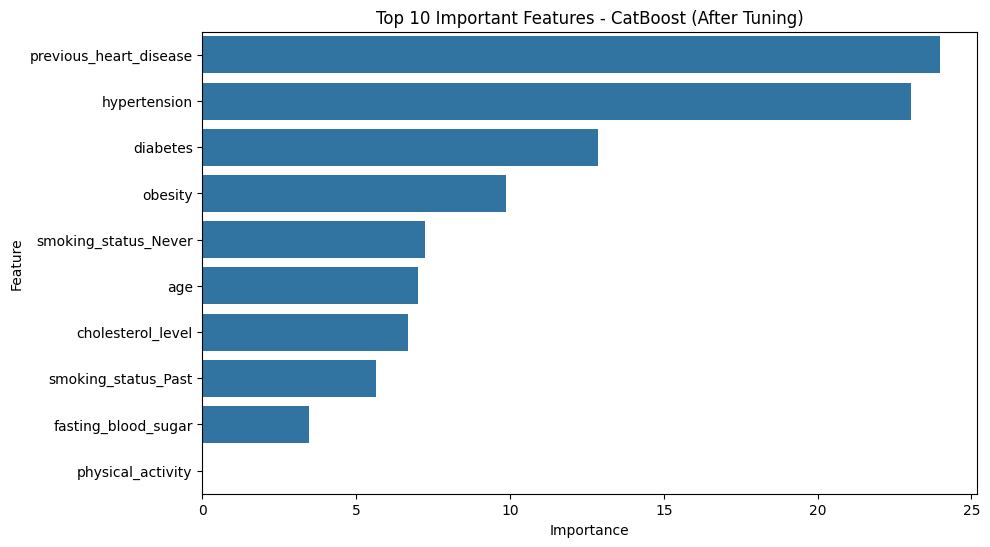

In [ ]:
# Feature importance for CatBoost after tuning
best_catboost = catboost_tuned.best_estimator_

# Ambil feature importance
importance = best_catboost.get_feature_importance(type='PredictionValuesChange')

catboost_importance_tuned = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=catboost_importance_tuned.head(10))
plt.title('Top 10 Important Features - CatBoost (After Tuning)')
plt.show()


# Final Model Selection

In [ ]:
# Model evaluation after tuning

from sklearn.metrics import roc_auc_score

# Define models
models = {
    'Logistic Regression': lr_tuned,
    'LightGBM (Tuned)': lgbm_tuned,
    'CatBoost (Tuned)': catboost_tuned
}

# Evaluate models
results_tuned = []

for name, model in models.items():
    acc, prec, rec, f1, auc = evaluate_model(model, X_test, y_test)

    results_tuned.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC-ROC': auc
    })

# Create DataFrame
results_tuned_df = pd.DataFrame(results_tuned)
results_tuned_df = results_tuned_df.sort_values(by='Accuracy', ascending=False)

In [ ]:
print("Evaluation Metrics Before Tuning:")
results_df

Evaluation Metrics Before Tuning:


Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
1             LightGBM  0.734229   0.687337  0.612871  0.647972  0.813806
2             CatBoost  0.734030   0.687757  0.610959  0.647087  0.811794
0  Logistic Regression  0.727128   0.686984  0.581026  0.629578  0.800162

In [ ]:
print("Evaluation Metrics After Tuning:")
results_tuned_df

Evaluation Metrics After Tuning:


Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
2     CatBoost (Tuned)  0.734594   0.688818  0.611042  0.647603  0.813874
1     LightGBM (Tuned)  0.734229   0.687337  0.612871  0.647972  0.813806
0  Logistic Regression  0.727062   0.686996  0.580693  0.629388  0.800165

In [ ]:
# Before tuning
y_pred_catboost_before = catboost.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_catboost_before))
print("Classification Report before tuning CatBoost:")
print(classification_report(y_test, y_pred_catboost_before))

Accuracy:  0.7340301974448316
Classification Report before tuning CatBoost:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     18108
           1       0.69      0.61      0.65     12027

    accuracy                           0.73     30135
   macro avg       0.72      0.71      0.72     30135
weighted avg       0.73      0.73      0.73     30135



In [ ]:
# After tuning
y_pred_catboost_after = catboost_tuned.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_catboost_after))
print("\nClassification Report after tuning CatBoost:")
print(classification_report(y_test, y_pred_catboost_after))

Accuracy:  0.7345943255350921

Classification Report after tuning CatBoost:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     18108
           1       0.69      0.61      0.65     12027

    accuracy                           0.73     30135
   macro avg       0.72      0.71      0.72     30135
weighted avg       0.73      0.73      0.73     30135



## Model Comparison Summary

Setelah melakukan training pada tiga model yang berbeda, berikut adalah hasil evaluasi pada data test set:

| Model                  | Accuracy | Precision | Recall | F1-Score | AUC-ROC |
|:------------------------|:---------|:----------|:-------|:---------|:--------|
| LightGBM (Tuned)        | 0.7342   | 0.6873    | 0.6129 | 0.6480   | 0.8138  |
| CatBoost (Tuned)        | 0.7346   | 0.6888    | 0.6110 | 0.6476   | 0.8139  |
| Logistic Regression     | 0.7271   | 0.6870    | 0.5807 | 0.6294   | 0.8002  |

---

**Insight Summary:**
- Secara keseluruhan, **LightGBM (Tuned)** dan **CatBoost (Tuned)** menunjukkan performa yang lebih baik dibanding Logistic Regression pada hampir semua metrik evaluasi.
- Walaupun perbedaannya tidak terlalu besar, **CatBoost** sedikit lebih unggul pada Accuracy, Precision, dan AUC-ROC dibandingkan LightGBM yang unggul di Recall maupun F1-Score.
- CatBoost Regression performanya cukup baik, namun recallnya kalah dibandingkan model tree-based.
- Untuk kasus prediksi serangan jantung ini, model tree-based (LightGBM & CatBoost) lebih cocok, kemungkinan karena:
  - Banyak fitur interaktif (non-linear)
  - Tree-based model lebih robust terhadap variabel kategori hasil encoding.

---

## Kesimpulan

Berdasarkan evaluasi dan interpretasi, **CatBoost dengan hyperparameter tuning** dipilih sebagai final model. Dilanjutkan dengan **LightGBM** yang bisa digunakan sebagai patokan pembanding dengan CatBoost

Future work dapat mencakup:
- Penambahan feature engineering
- Pengujian model pada data baru (real-world validation)
- Penerapan teknik explainability lanjutan seperti SHAP Dependence Plot dan LIME.



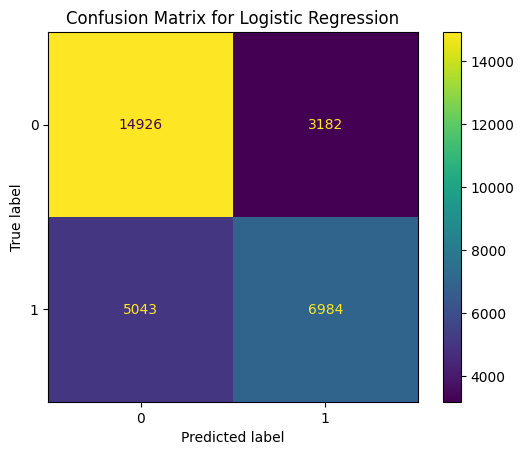

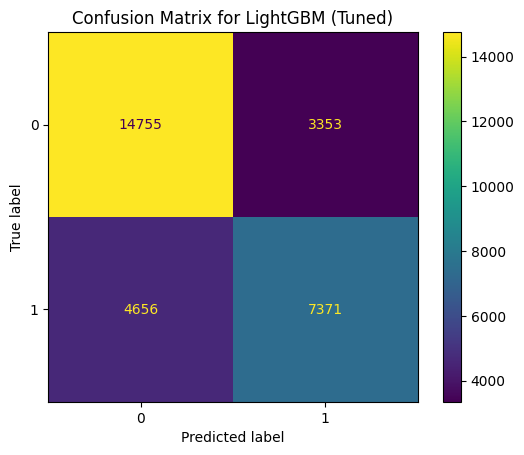

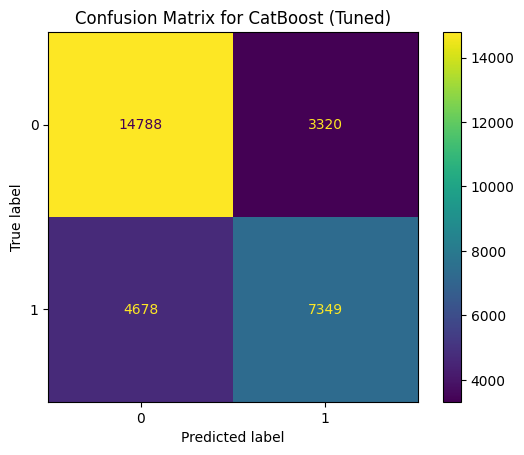

In [ ]:
# Confusion matrix for each model
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

#🏙️ Perbandingan Risiko Serangan Jantung: Urban vs Rural

Setelah model **LightGBM (Tuned)** dan juga **Catboost (Tuned)** selesai dilatih, dilakukan analisis lebih lanjut untuk membandingkan performa model antara pasien yang tinggal di wilayah **Urban** dan **Rural**. Subsetting berdasarkan kolom region, di mana:

- **Urban**: encoded sebagai 1
- **Rural**: encoded sebagai 0


In [ ]:
# Subset berdasarkan encoding region
X_test_urban = X_test[X_test['region'] == 1]  # Urban
X_test_rural = X_test[X_test['region'] == 0]  # Rural

y_test_urban = y_test[X_test['region'] == 1]
y_test_rural = y_test[X_test['region'] == 0]

In [ ]:
# Fungsi evaluasi sederhana
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_subset(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, model.predict_proba(X)[:, 1])
    return acc, prec, rec, f1, auc

In [ ]:
# Evaluasi untuk Urban
lgbm_urban_metrics = evaluate_subset(lgbm_tuned, X_test_urban, y_test_urban)

# Evaluasi untuk Rural
lgbm_rural_metrics = evaluate_subset(lgbm_tuned, X_test_rural, y_test_rural)

# Evaluasi untuk Urban
cb_urban_metrics = evaluate_subset(catboost_tuned, X_test_urban, y_test_urban)

# Evaluasi untuk Rural
cb_rural_metrics = evaluate_subset(catboost_tuned, X_test_rural, y_test_rural)

In [ ]:
# Tampilkan hasil
import pandas as pd

lgbm_comparison_df = pd.DataFrame({
    'Region': ['Urban', 'Rural'],
    'Accuracy': [lgbm_urban_metrics[0], lgbm_rural_metrics[0]],
    'Precision': [lgbm_urban_metrics[1], lgbm_rural_metrics[1]],
    'Recall': [lgbm_urban_metrics[2], lgbm_rural_metrics[2]],
    'F1 Score': [lgbm_urban_metrics[3], lgbm_rural_metrics[3]],
    'AUC-ROC': [lgbm_urban_metrics[4], lgbm_rural_metrics[4]]
})

cb_comparison_df = pd.DataFrame({
    'Region': ['Urban', 'Rural'],
    'Accuracy': [cb_urban_metrics[0], cb_rural_metrics[0]],
    'Precision': [cb_urban_metrics[1], cb_rural_metrics[1]],
    'Recall': [cb_urban_metrics[2], cb_rural_metrics[2]],
    'F1 Score': [cb_urban_metrics[3], cb_rural_metrics[3]],
    'AUC-ROC': [cb_urban_metrics[4], cb_rural_metrics[4]]
})

In [ ]:
print("LightGBM Prediction Comparsion Urban vs Rural")
lgbm_comparison_df

LightGBM Prediction Comparsion Urban vs Rural


Region  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0  Urban  0.731098   0.684043  0.610202  0.645016  0.814523
1  Rural  0.735911   0.689115  0.614311  0.649567  0.813342

In [ ]:
print("Catboost Prediction Comparsion Urban vs Rural")
cb_comparison_df

Catboost Prediction Comparsion Urban vs Rural


Region  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0  Urban  0.733473   0.688520  0.610439  0.647133  0.814328
1  Rural  0.735197   0.688979  0.611367  0.647857  0.813567

Perbandingan Urban vs Rural:

- Model cenderung sedikit lebih akurat di area **Rural** dibandingkan **Urban**.
- **Rural** biasanya memiliki akurasi, recall dan Precision dan F1-score sedikit lebih tinggi, diduga memiliki variabilitas data lebih besar serta diprediksi memiliki kualitas udara yang alami karena di pedesaan.
- **Urban** cenderung hanya menang di AUC-ROC mungkin karena akses kesehatan dan deteksi dini yang lebih baik di daerah perkotaan. Tapi bisa terdapat faktor lain seperti cuaca atau kualitas udara yang jelek dibandingkan Urban
- Bisa disebabkan faktor seperti: tingkat stress, pergaulan, atau kualitas data Rural yang lebih baik.


Insight: Mungkin perlu pendekatan berbeda untuk daerah Urban, seperti fitur tambahan (tingkat stress, pergaulan jelek di umur masih muda, kualitas udara yang dihirup tiap hari, dll).

#🧪 Simulasi skenario pencegahan

Pengambilang Sample Pasien dengan tujuan untuk mengetahui jika ada perubahan hidup pada seseorang yang awalnya diprediksi tinggi terkena serangan jantung meskipun kelihatan sehat oleh kedua model (Skala probabilitas diatas 60%)

In [ ]:
proba_preds_1 = catboost_tuned.predict_proba(X_test)[:,1]
proba_preds_2 = lgbm_tuned.predict_proba(X_test)[:,1]
mask = (y_test == 0) & (proba_preds_1 > 0.6) & (proba_preds_2 > 0.6)
sample_indices = X_test[mask].sample(5, random_state=42).index

In [ ]:
X_test_simulasi_before_raw = X_test_raw.loc[sample_indices].copy()
X_test_simulasi_after_raw_1 = X_test_raw.loc[sample_indices].copy()
X_test_simulasi_after_raw_2 = X_test_raw.loc[sample_indices].copy()

Lakukan Intervensi (Simulasi Perubahan 1) Misal:
- Tekanan darah sistolik turun 20 mmHg.
- LDL cholesterol turun 30 mg/dL.
- Stress level diturunkan (asumsikan kalau ini kategori, maka turunkan ke kategori lebih sehat).


In [ ]:
# Lakukan modifikasi fitur sesuai kebutuhan
X_test_simulasi_after_raw_1['blood_pressure_systolic'] -= 20
X_test_simulasi_after_raw_1['cholesterol_ldl'] -= 30
X_test_simulasi_after_raw_1['sleep_hours'] += 1
X_test_simulasi_after_raw_1['stress_level'] = X_test_simulasi_after_raw_1['stress_level'].replace({
    'High': 'Moderate',
    'Moderate': 'Low'
})

Lakukan Intervensi (Simulasi Perubahan 2) yang dimana berfokus pada fitur yang berpengaruh seperti yang didapatkan dalam Feature Importance Misal:
- Mengubah status hipertensi, riwayat penyakit jantung, obesitas, diabetes menjadi tidak
- Menurunkan kadar kolestrol 50 mg/DL
- Stress level diturunkan (asumsikan kalau ini kategori, maka turunkan ke kategori lebih sehat).

In [ ]:
# Modifikasi fitur yang berpengaruh
X_test_simulasi_after_raw_2['hypertension'] = 0
X_test_simulasi_after_raw_2['previous_heart_disease'] = 0
X_test_simulasi_after_raw_2['obesity'] = 0
X_test_simulasi_after_raw_2['diabetes'] = 0
X_test_simulasi_after_raw_2['cholesterol_level'] -= 50

In [ ]:
X_test_simulasi_before_raw

age  gender region income_level  hypertension  diabetes  \
13716    66    Male  Urban       Middle             1         0   
28364    45  Female  Urban       Middle             1         0   
5937     36  Female  Urban       Middle             0         0   
95292    53    Male  Urban          Low             1         1   
149937   69    Male  Urban          Low             1         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
13716                 259        0                   75               1  ...   
28364                 159        0                   87               0  ...   
5937                  173        1                  119               0  ...   
95292                 121        0                   82               0  ...   
149937                209        0                  112               0  ...   

       blood_pressure_systolic blood_pressure_diastolic fasting_blood_sugar  \
13716                      144                       56                  91   
28364                      110                       80                  92   
5937                       109                       59                 109   
95292                      105                       79                 120   
149937                     145                      101                 110   

       cholesterol_hdl cholesterol_ldl triglycerides  EKG_results  \
13716               34             112           168       Normal   
28364               48             139            82       Normal   
5937                48              73           193       Normal   
95292               35             154           224       Normal   
149937              39             110           154     Abnormal   

        previous_heart_disease  medication_usage  \
13716                        0                 1   
28364                        1                 0   
5937                         1                 0   
95292                        0                 1   
149937                       0                 1   

        participated_in_free_screening  
13716                                0  
28364                                1  
5937                                 1  
95292                                1  
149937                               0  

[5 rows x 27 columns]

In [ ]:
X_test_simulasi_after_raw_1

age  gender region income_level  hypertension  diabetes  \
13716    66    Male  Urban       Middle             1         0   
28364    45  Female  Urban       Middle             1         0   
5937     36  Female  Urban       Middle             0         0   
95292    53    Male  Urban          Low             1         1   
149937   69    Male  Urban          Low             1         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
13716                 259        0                   75               1  ...   
28364                 159        0                   87               0  ...   
5937                  173        1                  119               0  ...   
95292                 121        0                   82               0  ...   
149937                209        0                  112               0  ...   

       blood_pressure_systolic blood_pressure_diastolic fasting_blood_sugar  \
13716                      124                       56                  91   
28364                       90                       80                  92   
5937                        89                       59                 109   
95292                       85                       79                 120   
149937                     125                      101                 110   

       cholesterol_hdl cholesterol_ldl triglycerides  EKG_results  \
13716               34              82           168       Normal   
28364               48             109            82       Normal   
5937                48              43           193       Normal   
95292               35             124           224       Normal   
149937              39              80           154     Abnormal   

        previous_heart_disease  medication_usage  \
13716                        0                 1   
28364                        1                 0   
5937                         1                 0   
95292                        0                 1   
149937                       0                 1   

        participated_in_free_screening  
13716                                0  
28364                                1  
5937                                 1  
95292                                1  
149937                               0  

[5 rows x 27 columns]

In [ ]:
X_test_simulasi_after_raw_2

age  gender region income_level  hypertension  diabetes  \
13716    66    Male  Urban       Middle             0         0   
28364    45  Female  Urban       Middle             0         0   
5937     36  Female  Urban       Middle             0         0   
95292    53    Male  Urban          Low             0         0   
149937   69    Male  Urban          Low             0         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
13716                 209        0                   75               1  ...   
28364                 109        0                   87               0  ...   
5937                  123        0                  119               0  ...   
95292                  71        0                   82               0  ...   
149937                159        0                  112               0  ...   

       blood_pressure_systolic blood_pressure_diastolic fasting_blood_sugar  \
13716                      144                       56                  91   
28364                      110                       80                  92   
5937                       109                       59                 109   
95292                      105                       79                 120   
149937                     145                      101                 110   

       cholesterol_hdl cholesterol_ldl triglycerides  EKG_results  \
13716               34             112           168       Normal   
28364               48             139            82       Normal   
5937                48              73           193       Normal   
95292               35             154           224       Normal   
149937              39             110           154     Abnormal   

        previous_heart_disease  medication_usage  \
13716                        0                 1   
28364                        0                 0   
5937                         0                 0   
95292                        0                 1   
149937                       0                 1   

        participated_in_free_screening  
13716                                0  
28364                                1  
5937                                 1  
95292                                1  
149937                               0  

[5 rows x 27 columns]

In [ ]:
X_test_simulasi_before, _ = preprocess_dataset(
    X_test_simulasi_before_raw,
    ordinal_mappings=ordinal_mappings,
    binary_mappings=binary_mappings,
    num_cols=num_cols,
    scaler=scaler,
    fit_scaler=False,
    reference_columns=X_train.columns
)

X_test_simulasi_after_1, _ = preprocess_dataset(
    X_test_simulasi_after_raw_1,
    ordinal_mappings=ordinal_mappings,
    binary_mappings=binary_mappings,
    num_cols=num_cols,
    scaler=scaler,
    fit_scaler=False,
    reference_columns=X_train.columns
)

X_test_simulasi_after_2, _ = preprocess_dataset(
    X_test_simulasi_after_raw_2,
    ordinal_mappings=ordinal_mappings,
    binary_mappings=binary_mappings,
    num_cols=num_cols,
    scaler=scaler,
    fit_scaler=False,
    reference_columns=X_train.columns
)

In [ ]:
X_test_simulasi_before

age  gender  region  income_level  hypertension  diabetes  \
13716   0.976731       0       0             1             1         0   
28364  -0.800557       1       0             1             1         0   
5937   -1.562252       1       0             1             0         0   
95292  -0.123495       0       0             0             1         1   
149937  1.230629       0       0             0             1         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
13716            1.526686        0            -1.143187               1  ...   
28364           -1.023650        0            -0.389966               0  ...   
5937            -0.666603        1             1.618625               0  ...   
95292           -1.992778        0            -0.703808               0  ...   
149937           0.251518        0             1.179246               0  ...   

        fasting_blood_sugar  cholesterol_hdl  cholesterol_ldl  triglycerides  \
13716             -0.711393        -1.611202        -0.519892       0.385612   
28364             -0.674652        -0.156050         0.276837      -1.392268   
5937              -0.050042        -0.156050        -1.670723       0.902437   
95292              0.354117        -1.507262         0.719464       1.543301   
149937            -0.013300        -1.091505        -0.578909       0.096190   

        EKG_results  previous_heart_disease  medication_usage  \
13716             0                       0                 1   
28364             0                       1                 0   
5937              0                       1                 0   
95292             0                       0                 1   
149937            1                       0                 1   

        participated_in_free_screening  smoking_status_Never  \
13716                                0                     0   
28364                                1                     0   
5937                                 1                     0   
95292                                1                     0   
149937                               0                     0   

        smoking_status_Past  
13716                     0  
28364                     0  
5937                      0  
95292                     0  
149937                    0  

[5 rows x 28 columns]

In [ ]:
X_test_simulasi_after_1

age  gender  region  income_level  hypertension  diabetes  \
13716   0.976731       0       0             1             1         0   
28364  -0.800557       1       0             1             1         0   
5937   -1.562252       1       0             1             0         0   
95292  -0.123495       0       0             0             1         1   
149937  1.230629       0       0             0             1         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
13716            1.526686        0            -1.143187               1  ...   
28364           -1.023650        0            -0.389966               0  ...   
5937            -0.666603        1             1.618625               0  ...   
95292           -1.992778        0            -0.703808               0  ...   
149937           0.251518        0             1.179246               0  ...   

        fasting_blood_sugar  cholesterol_hdl  cholesterol_ldl  triglycerides  \
13716             -0.711393        -1.611202        -1.405147       0.385612   
28364             -0.674652        -0.156050        -0.608418      -1.392268   
5937              -0.050042        -0.156050        -2.555978       0.902437   
95292              0.354117        -1.507262        -0.165790       1.543301   
149937            -0.013300        -1.091505        -1.464164       0.096190   

        EKG_results  previous_heart_disease  medication_usage  \
13716             0                       0                 1   
28364             0                       1                 0   
5937              0                       1                 0   
95292             0                       0                 1   
149937            1                       0                 1   

        participated_in_free_screening  smoking_status_Never  \
13716                                0                     0   
28364                                1                     0   
5937                                 1                     0   
95292                                1                     0   
149937                               0                     0   

        smoking_status_Past  
13716                     0  
28364                     0  
5937                      0  
95292                     0  
149937                    0  

[5 rows x 28 columns]

In [ ]:
X_test_simulasi_after_2

age  gender  region  income_level  hypertension  diabetes  \
13716   0.976731       0       0             1             0         0   
28364  -0.800557       1       0             1             0         0   
5937   -1.562252       1       0             1             0         0   
95292  -0.123495       0       0             0             0         0   
149937  1.230629       0       0             0             0         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
13716            0.251518        0            -1.143187               1  ...   
28364           -2.298819        0            -0.389966               0  ...   
5937            -1.941772        0             1.618625               0  ...   
95292           -3.267946        0            -0.703808               0  ...   
149937          -1.023650        0             1.179246               0  ...   

        fasting_blood_sugar  cholesterol_hdl  cholesterol_ldl  triglycerides  \
13716             -0.711393        -1.611202        -0.519892       0.385612   
28364             -0.674652        -0.156050         0.276837      -1.392268   
5937              -0.050042        -0.156050        -1.670723       0.902437   
95292              0.354117        -1.507262         0.719464       1.543301   
149937            -0.013300        -1.091505        -0.578909       0.096190   

        EKG_results  previous_heart_disease  medication_usage  \
13716             0                       0                 1   
28364             0                       0                 0   
5937              0                       0                 0   
95292             0                       0                 1   
149937            1                       0                 1   

        participated_in_free_screening  smoking_status_Never  \
13716                                0                     0   
28364                                1                     0   
5937                                 1                     0   
95292                                1                     0   
149937                               0                     0   

        smoking_status_Past  
13716                     0  
28364                     0  
5937                      0  
95292                     0  
149937                    0  

[5 rows x 28 columns]

In [ ]:
y_predictions_before_cb = catboost_tuned.predict(X_test_simulasi_before)
y_predictions_after_cb_1 = catboost_tuned.predict(X_test_simulasi_after_1)
y_predictions_after_cb_2 = catboost_tuned.predict(X_test_simulasi_after_2)

y_predictions_before_lgbm = lgbm_tuned.predict(X_test_simulasi_before)
y_predictions_after_lgbm_1 = lgbm_tuned.predict(X_test_simulasi_after_1)
y_predictions_after_lgbm_2 = lgbm_tuned.predict(X_test_simulasi_after_2)

In [ ]:
y_predictions_proba_before_cb = catboost_tuned.predict_proba(X_test_simulasi_before)[:, 1]
y_predictions_proba_after_cb_1 = catboost_tuned.predict_proba(X_test_simulasi_after_1) [:, 1]
y_predictions_proba_after_cb_2 = catboost_tuned.predict_proba(X_test_simulasi_after_2) [:, 1]

y_predictions_proba_before_lgbm = lgbm_tuned.predict_proba(X_test_simulasi_before)[:, 1]
y_predictions_proba_after_lgbm_1 = lgbm_tuned.predict_proba(X_test_simulasi_after_1)[:, 1]
y_predictions_proba_after_lgbm_2 = lgbm_tuned.predict_proba(X_test_simulasi_after_2) [:, 1]

In [ ]:
comparison_lgbm_df = pd.DataFrame({
    'Before Intervetion' : y_predictions_before_lgbm,
    'After Intervention Case 1': y_predictions_after_lgbm_1,
    'After Intervention Case 2': y_predictions_after_lgbm_2
})

print("Comparison Interpretation Simulation LightGBM")
comparison_lgbm_df

Comparison Interpretation Simulation LightGBM


Before Intervetion  After Intervention Case 1  After Intervention Case 2
0                   1                          1                          0
1                   1                          1                          0
2                   1                          1                          0
3                   1                          1                          0
4                   1                          1                          0

In [ ]:
comparison_proba_lgbm_df = pd.DataFrame({
    'Before Intervetion' : y_predictions_proba_before_lgbm,
    'After Intervention Case 1': y_predictions_proba_after_lgbm_1,
    'After Intervention Case 2': y_predictions_proba_after_lgbm_2
})

print("Comparison Interpretation Simulation LightGBM Probability")
comparison_proba_lgbm_df

Comparison Interpretation Simulation LightGBM Probability


Before Intervetion  After Intervention Case 1  After Intervention Case 2
0            0.809859                   0.808839                   0.335498
1            0.793796                   0.763941                   0.181649
2            0.808248                   0.791500                   0.208786
3            0.721911                   0.736973                   0.186190
4            0.677899                   0.687089                   0.323398

In [ ]:
comparison_cb_df = pd.DataFrame({
    'Before Intervetion' : y_predictions_before_cb,
    'After Intervention Case 1': y_predictions_after_cb_1,
    'After Intervention Case 2': y_predictions_after_cb_2
})

print("Comparison Interpretation Simulation CatBoost")
comparison_cb_df

Comparison Interpretation Simulation CatBoost


Before Intervetion  After Intervention Case 1  After Intervention Case 2
0                   1                          1                          0
1                   1                          1                          0
2                   1                          1                          0
3                   1                          1                          0
4                   1                          1                          0

In [ ]:
comparison_proba_cb_df = pd.DataFrame({
    'Before Intervetion' : y_predictions_proba_before_cb,
    'After Intervention Case 1': y_predictions_proba_after_cb_1,
    'After Intervention Case 2': y_predictions_proba_after_cb_2
})

print("Comparison Interpretation Simulation CatBoost in Probability")
comparison_proba_cb_df

Comparison Interpretation Simulation CatBoost in Probability


Before Intervetion  After Intervention Case 1  After Intervention Case 2
0            0.836215                   0.836717                   0.329786
1            0.844698                   0.851354                   0.156152
2            0.777707                   0.783222                   0.161131
3            0.758575                   0.731925                   0.156435
4            0.686661                   0.683683                   0.334664

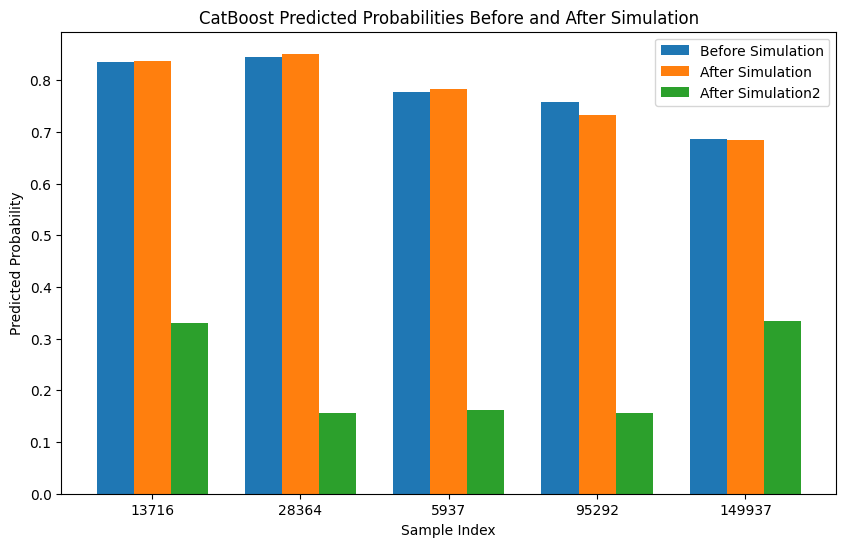

In [ ]:
indices = np.arange(5)
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(indices - bar_width, y_predictions_proba_before_cb, width=bar_width, label='Before Simulation')
plt.bar(indices, y_predictions_proba_after_cb_1, width=bar_width, label='After Simulation')
plt.bar(indices + bar_width, y_predictions_proba_after_cb_2, width=bar_width, label='After Simulation2')

plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('CatBoost Predicted Probabilities Before and After Simulation')
plt.xticks(indices, sample_indices)  # agar label x-axis pakai index row asli
plt.legend()
plt.show()

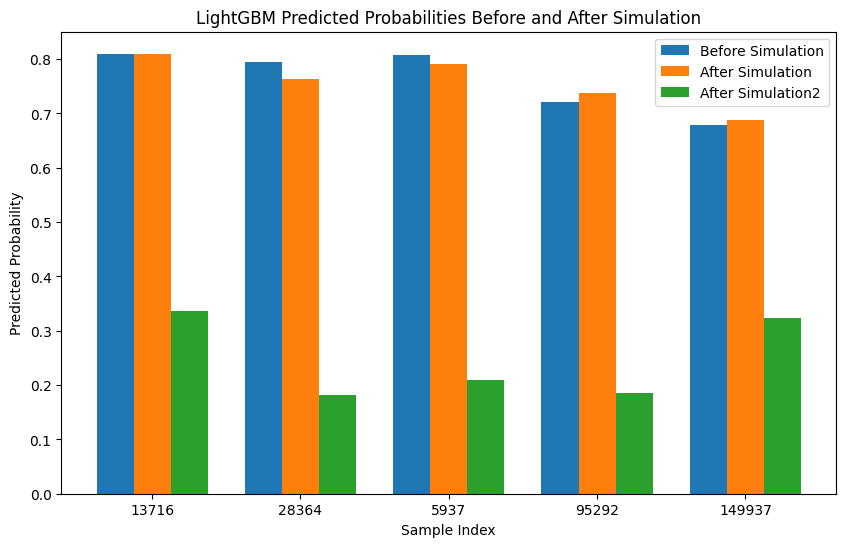

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(indices - bar_width, y_predictions_proba_before_lgbm, width=bar_width, label='Before Simulation')
plt.bar(indices, y_predictions_proba_after_lgbm_1, width=bar_width, label='After Simulation')
plt.bar(indices + bar_width, y_predictions_proba_after_lgbm_2, width=bar_width, label='After Simulation2')

plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('LightGBM Predicted Probabilities Before and After Simulation')
plt.xticks(indices, sample_indices)  # agar label x-axis pakai index row asli
plt.legend()
plt.show()